#Cars4U - Problem Statement

There has been a recent shift in the Indian car market. New car sales have dropped off, while used car sales have come to surpass them. 
Cars4U is a new tech start-up looking to find a foothold in India's rapidly growing used car market.

India's new car sales were 3.6 million for 2018 - 2019, but used car sales were around 4 million. Consumer demand is definitely changing and it is having a significant impact on India's car market. New car sellers are actually beginning to replace their stock with pre-owned vehicles instead of ordering more new cars. 

New cars tend to have a mostly pre-determined supply and pricing model based on prices set by the manufactures. Used cars, on the other hand, have wildly uncertain pricing and supply. Cars4U needs to determine a way to find patterns in this seemingly unpredictable pre-owned market in order to be competitive. 

As a senior data scientist at Cars4U, I am going to create a pricing model that will effectively predict the price of pre-owned vehicles in the Indian automotive market. My model will allow the business to set a variable pricing strategy based on multiple factors in order to keep them ahead of the competion. The pricing predictions based on this model will serve to maximize profit and minimize the risk of loss by preventing vehichles from being sold under market value in this highly volatile pre-owned market. 

###My Objective
I am going to use exploratory data analysis on this dataset, in order to create a linear regression model that will be able to predict the prices for used cars in the Indian market. 

The results of my model's predictions will allow me to compile my recommendations as to how Cars4U should go about implementing a variable pricing strategy for their used car sales.

##Data Dictionary

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

##Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Python Course/used_cars_data.csv')

In [ ]:
# make a copy of the data
df = data.copy()

In [ ]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


- Data has imported correctly

#Data Overview

In [ ]:
# check the shape of the data
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the data.')

There are 7253 rows and 14 columns in the data.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


- There are 3 integer, 3 floats, and 8 object types in the data
- Milelage, Engine, Power, Seats, and Price all appear to have some missing values

In [ ]:
# check for missing value totals in each column
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

- 5 columns have missing values.
- There doesn't appear to be any pattern to the missing values.
- The pricing column for the used cars seems to be missing quite a bit of values. This could cause some issues as trying to predict pricing for used cars based on these other features will be hurt by missing exisitng used car pricing data.
- As pricing is our dependant variable it may be preferable to drop these missing values in the pricing column.

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There are 2041 different car names out of the 7253
- There are 5 different fuel types amongst these vehicles
- The mean year for used cars in this data set is 2013 
- From the context this study is being done in 2018-2019 which means we are looking at used cars around 5-6 years old on average.
- The mean kilometers driven on these used cars is around 84,000km, but it looks like we have a max kilometers driven at 6,500,000km, this seems like an excessively high number. This is either an error, or an extreme outlier, which either way would be having a major impact on the mean kilometers driven. This will definitely need to be investigated further.
- To better frame price in my mind I looked up the INR Lakhs curreny in relation to dollars. 1 INR Lakhs = 100,000 INR = approx. 1,255 dollars.
- This means the mean new price for these cars, 21.3 INR Lakhs, is close to 27,000 dollars and the mean price for used cars is 9.5 INR Lakhs, which is around 12,000 dollars.
- The max new price amongst these cars, 375 INR Lakhs, is about 470,625 dollars. While this is entirely possible, it is a significantly higher amount than the mean and may be an outlier affecting our pricing data.
- The max price for used cars, 160 INR Lakhs, is about 200,800 dollars which I would guess most likely aligns with the max priced new vehicle, but still seems far above the mean used car market pricing. So while perhaps not an error, it may be an extreme outlier skewing our data.

In [ ]:
# The Serial Number (S.No.) column is the same as the index so we will drop it
df.drop(['S.No.'], axis=1, inplace=True)

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


- We no longer have the S.No. column as a duplicate for index. This helps to clean up our data a little.
- We can further clean up our data by looking into the value counts and data types in order to gain further insights.

#Univariate Analysis 

##Let's start with the Object type variables

##Name

We saw earlier with df.describe() that there were 2041 different vehichles listed in our used car data.  This is a lot of unique values which we may need to look as consolidatiing.

In [ ]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

- The count shows that Mahindra XUV500 W8 2WD is the most sold used car in our data set with 55 different records for this vehichle make and model.
- There are several more with multiple entries such as this, but out of 2041 different vehicles it looks like there will be a lot of cars with only one sales record for that particular make and model.
- Having this many different types of cars, many with a sing record, will cause a vast amount of dimensionality in the model making Name into a categorical variable.  In order to reduce dimensionality for car Names, I will try grouping them by their different Makes.

First let's change Name from an object type to a category type variable

In [ ]:
# changing data type
df['Name']=df['Name'].astype('category')
df['Name'].dtype

CategoricalDtype(categories=['Ambassador Classic Nova Diesel',
                  'Audi A3 35 TDI Attraction', 'Audi A3 35 TDI Premium',
                  'Audi A3 35 TDI Premium Plus', 'Audi A3 35 TDI Technology',
                  'Audi A4 1.8 TFSI', 'Audi A4 1.8 TFSI Technology Edition',
                  'Audi A4 2.0 TDI', 'Audi A4 2.0 TDI 177 Bhp Premium Plus',
                  'Audi A4 2.0 TDI 177 Bhp Technology Edition',
                  ...
                  'Volvo S80 D5', 'Volvo V40 Cross Country D3', 'Volvo V40 D3',
                  'Volvo V40 D3 R Design', 'Volvo XC60 D4 SUMMUM',
                  'Volvo XC60 D4 Summum', 'Volvo XC60 D5',
                  'Volvo XC60 D5 Inscription',
                  'Volvo XC90 2007-2015 D5 AT AWD',
                  'Volvo XC90 2007-2015 D5 AWD'],
, ordered=False)

- Name column has successfully been changed to a categorical variable.

I need to split up the Name of the cars in order to separate the brand Make from the full Name. The other part of the split will be their model type. I'm not sure yet if I plan on using the model type or how I would use it, but it will be nice to have in case it I need it.

In [ ]:
# Splitting the car Name in order to get their Make and Model
df[['Car_Make', 'Car_Model']] = df.Name.str.split(n=1, expand=True)

In [ ]:
df['Car_Make'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Car_Make, dtype: int64

- Maruti is the Make for the largest number of used cars in our data set followed closely by Huyndai as the 2nd most sold vehicle Make.
- There are 5 vehicle Makes with only one used car sales record in the data.
- Scanning through the list 'Land' is listed as a vehicle Make, but the full name should be 'Land Rover'.
- 'Isuzu' is listed twice once as with only the 1st letter capitalized as all the other Makes, and then once in all caps as 'ISUZU', These need to be combined.

In [ ]:
# Use .replace Method to change 'Land' to 'Land Rover' in ['Car_Make'] column
df['Car_Make'] = df['Car_Make'].replace('Land', 'Land Rover')

In [ ]:
# Use .replace to change the all caps version to just be Isuzu 
df['Car_Make'] = df['Car_Make'].replace('ISUZU', 'Isuzu')

In [ ]:
Make = df['Car_Make'].unique()
Make

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'OpelCorsa'], dtype=object)

In [ ]:
df['Car_Make'].nunique()

32

- 'Land' has been changed to 'Land Rover' and the 'Isuzu' duplication from capitalization has been corrected.
- We can now see the 32 different Makes for the used cars in our dataset.

##Location

In [ ]:
df['Location'].value_counts()

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

- Here we can see the 11 locations for our used car sales data
- Mumbai has the largest number of sales in our data with 949 and Ahmedabad has the lowest number at 275.
- Location is currently an object variable so will need to change it's data type to categorical.

Changing Location Data Type to Categorical

In [ ]:
# change data type 
df['Location'] = df['Location'].astype('category')
df['Location'].dtype

CategoricalDtype(categories=['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
                  'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
, ordered=False)

- Location's data type is now categorical

###Let's make a countplot to get a better look at 'Location'

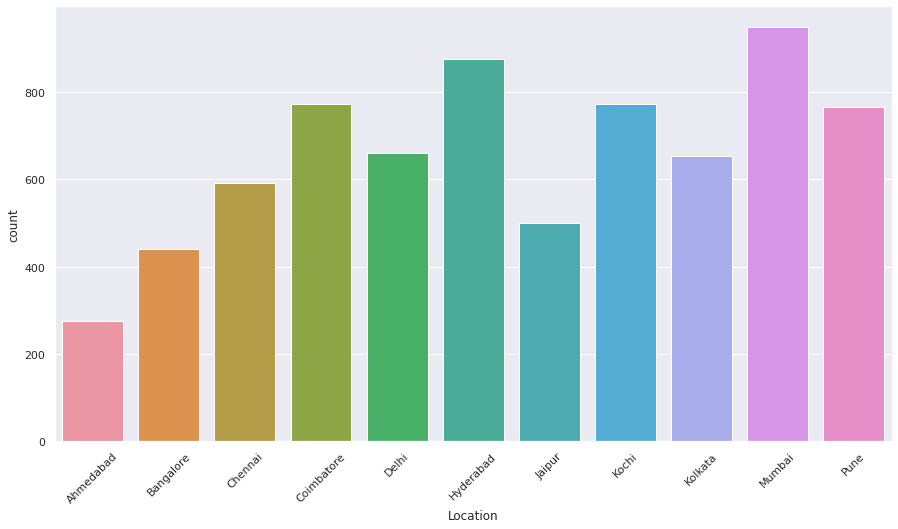

In [ ]:
# set size
plt.figure(figsize=(15, 8))

sns.countplot(data=df, x='Location')
# rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.show()

- Mumbai has the most sales
- Hyderabad, Pune, Coimbatore, and Kochi are not far behind though
- Overall there is not an extremely uneven distribution of sales amongst the locations, with Ahmedabad being the only one significantly lower than the others.

##Fuel Type

In [ ]:
df['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

- There are 5 different fuel types
- The majority of our data is either Diesel or Petrol with Diesel being the highest.
- Out of the 7,253 vehicles, less than 100 have fuel types other than Petrol or Diesel. 
- There are only 2 electric vehicles in all of the dataset.

Let's go ahead and change the data type to Categorical

In [ ]:
# Change data type
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Fuel_Type'].dtype

CategoricalDtype(categories=['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], ordered=False)

- Fuel Type is now a categorical variable

###Let's make a countplot for 'Fuel_Type'

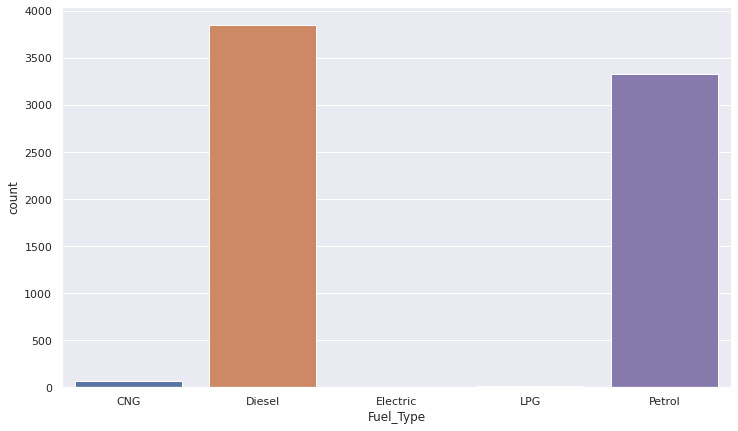

In [ ]:
# size
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='Fuel_Type')

plt.show()

- As value counts showed, we are mainly looking at Diesel vs. Petrol in the used cars.
- The other fuel types are practically non-visible in this chart.

##Transmission

In [ ]:
df['Transmission'].value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

- There are only 2 transmission types Manual being the most common at more than double the amount of Automatic transmissions.

Let's go ahead and make Transmission a categorical variable

In [ ]:
# changing to category data type
df['Transmission'] = df['Transmission'].astype('category')
df['Transmission'].dtype

CategoricalDtype(categories=['Automatic', 'Manual'], ordered=False)

- Transmission is no longer an object type, instead it is now categorical data type.

###Let's make a countplot for Transmission

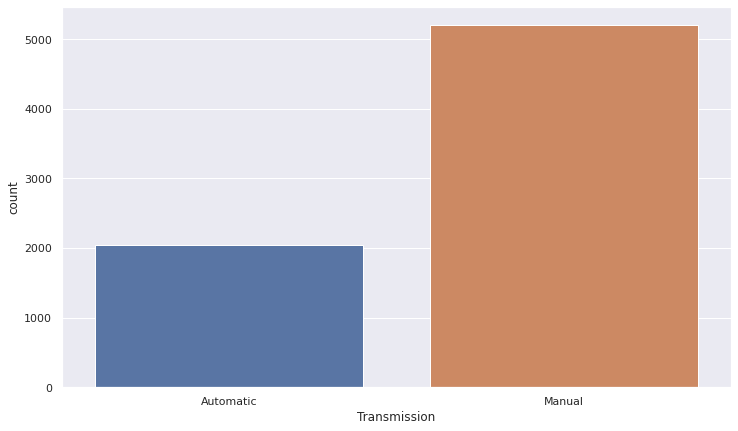

In [ ]:
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='Transmission')

plt.show()

- This helps to visualize just how many more used vehicles have manual transmissions

##Owner Type

In [ ]:
df['Owner_Type'].value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

- There are 4 Owner types with most of the used vehicles being sold by the 1st owner.
- There are a fair amount being sold by the 2nd owner.
- We see a huge drop off when it comes to used vehicle being sold by the 3rd owner, and only 12 vehicles being sold by the 4th owner or above.

We will go ahead and change the data type to categorical 

In [ ]:
df['Owner_Type'] = df['Owner_Type'].astype('category')
df['Owner_Type'].dtype

CategoricalDtype(categories=['First', 'Fourth & Above', 'Second', 'Third'], ordered=False)

- Owner Type is now a categorical data type

###Let's make a countplot for Owner_Type

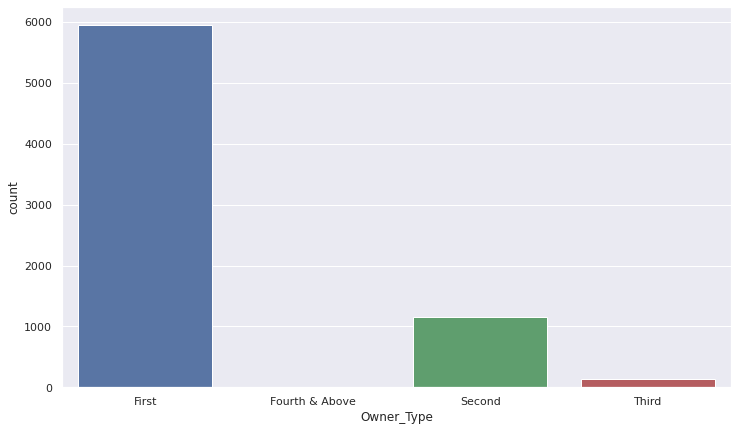

In [ ]:
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='Owner_Type')

plt.show()

- We can clearly see that the majority of used car sales are being sold by the original owner.
- There is still a small share of the used car market being 2nd hand owner sales, but beyond that 3rd, 4th, and above have very little sales in the used vehicle market.

#Numerical Variables

##Year

In [ ]:
df['Year'].value_counts()

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64

- The most common year for used vehicles amongst our data set is 2015
- We see a drop off on used vehicle numbers at 2006 and older, with the oldest being a single vehicle from 1996.
- We have used cars in our data set for every year from 1996 to 2019, except for 1997.

### Let's look at a histogram and boxplot for 'Year'

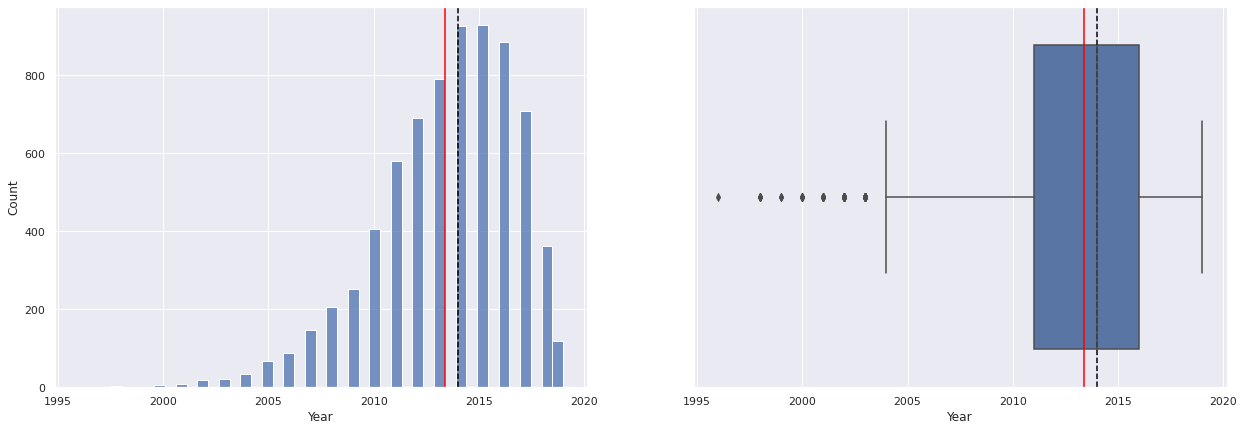

In [ ]:
# set figure size
plt.figure(figsize=(21, 7))

# use a subplot for side by side comparison
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Year')
# add lines to indicate mean & median for histogram
plt.axvline(df['Year'].mean(), color='red', linestyle='-')  
plt.axvline(df['Year'].median(), color='black', linestyle='--')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Year')
# add lines to indicate mean & median for boxplot
plt.axvline(df['Year'].mean(), color='red', linestyle='-')  
plt.axvline(df['Year'].median(), color='black', linestyle='--')

plt.show()

- Year data is left skewed, which matches what we saw in value counts with there being a large drop off for older vehichles.
- These outliers from the small number of older vehichles is having an effect on the mean.
- The majority of used car sales seem to be from vehicle models that are between 2012 - 2017, with some drop off in either direction from there.

##Let's make a histogram and barplot for 'Kilometers_Driven'

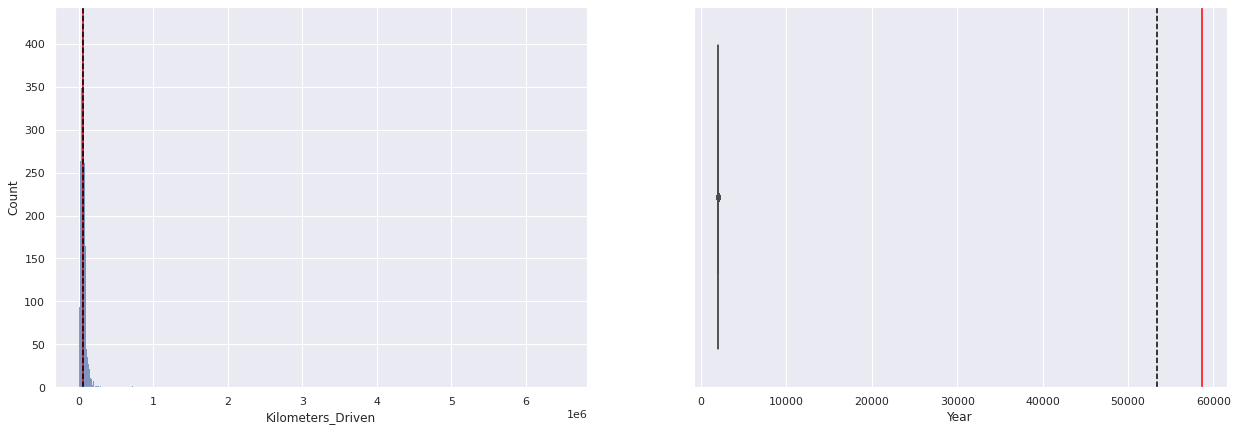

In [ ]:
# set figure size
plt.figure(figsize=(21, 7))

# use a subplot for side by side comparison
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Kilometers_Driven')
# add lines to indicate mean & median for histogram
plt.axvline(df['Kilometers_Driven'].mean(), color='red', linestyle='-')  
plt.axvline(df['Kilometers_Driven'].median(), color='black', linestyle='--')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Year')
# add lines to indicate mean & median for boxplot
plt.axvline(df['Kilometers_Driven'].mean(), color='red', linestyle='-')  
plt.axvline(df['Kilometers_Driven'].median(), color='black', linestyle='--')

plt.show()

- This graph is not very easy to read at all due to the scale of the data for 'Kilometers_Driven'
- Let's see if we can scale this data down to something more manageable to plot for readability.

###Let's create a new histogram 'Kilometers_Driven' using the log transformation

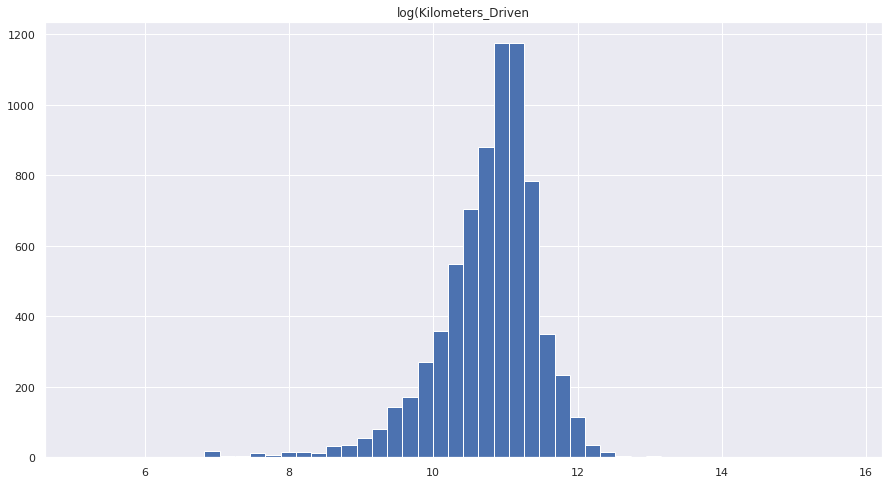

In [ ]:
# set figure size
plt.figure(figsize=(15, 8))

# create a histogram using log scale with np.log
plt.hist(np.log(df['Kilometers_Driven']), 50)
#adding a tile to show difference from above chart without log transform
plt.title('log(Kilometers_Driven')


plt.show()

- This histogram is much easier to read
- The distribution has a fairly normal shape, but it does have a small tail causing it to be slightly left skewed.


##Mileage 

- We will look at Mileage a little differently as Mileage is an object type variable with 2 different units of measure, km/kg, and kmpl.
- Both of these measurements refer to kilometers per fuel type, the units are just based on the way it is measured with different fuel types.
- We can strip away these different units to get just the mileage as a numerical variable.

In [ ]:
# creating a function to remove units from Mileage and return a float
# this function uses the replace method to remove the units
def km_to_num(km_val):
    """
    This func. takes in a str (distance in km) and converts it
    to a number. '26.6 km/kg' becomes 26.6 There are 2 missing 
    values, which are NaN, for these the func. will return np.nan.
    """
    if isinstance(km_val, str):
        if km_val.endswith('km/kg'):
          return float(km_val.replace('km/kg', ''))
        elif km_val.endswith('kmpl'):
          return float(km_val.replace('kmpl', ''))
    else:
        return np.nan

In [ ]:
# We will now apply our user defined function to 'Mileage'
# The results will be stored in a new column 'Mileage_km'
df['Mileage_km'] = df['Mileage'].apply(km_to_num)
df[['Mileage_km', 'Mileage']].head()

,Mileage_km,Mileage
0,26.60,26.6 km/kg
1,19.67,19.67 kmpl
2,18.20,18.2 kmpl
3,20.77,20.77 kmpl
4,15.20,15.2 kmpl


In [ ]:
# Now we will drop the original 'Mileage' column as it is no longer needed
df.drop('Mileage', axis=1, inplace=True)

In [ ]:
# Now that it is numeric we can see all stats with describe
df['Mileage_km'].describe()

count    7251.000000
mean       18.141580
std         4.562197
min         0.000000
25%        15.170000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage_km, dtype: float64

- We can see the mean milelage per km of fuel is 18.14 km, while median is 18.16, so they are almost the exact same.  This probably means that it will have a normal looking distribution, but we will have to check see it that's true.
- The max mileage per km is 33.54 
- It shows a min. of 0 mileage per km of fuel, this doesn't seem right.  I don't think a car can get 0 milelage per km of fuel. We will definitely need to see what is going on there.

In [ ]:
# min. shouldn't be zero for 'Mileage_km' 
# let's see how many entries show 0 for 'Mileage_km'
df['Mileage_km'].value_counts()[0]

81

- 81 entries that are not NAN are showing zero, so it looks like there are more missing values than the 2 NaNs shown in our original isnull().sum() check we performed. 
- isnull().sum() only checked for NaNs because in a lot of cases zero could be a perfectly valid data entry. However, in this case zero doesn't make sense for the mileage in km of fuel. A vehicle isn't going anywhere if it gets zero kilometers per whichever fuel type. Therefore these zeros are missing values for the 'Mileage_km' variable.
- We don't want to drop all of these entries so we will need to find a way to treat them.

In [ ]:
# we can take a look at all the entries showing 0 for 'Mileage_km'
dfkm = df[(df.Mileage_km <= 0)]
# Instead of all 81 rows, I'll just check the 1st 5 rows
dfkm.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Car_Make,Car_Model,Mileage_km
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,2179 CC,115 bhp,5.0,120.00,17.50,Land Rover,Rover Freelander 2 TD4 SE,0.0
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,1950 CC,194 bhp,5.0,49.14,35.67,Mercedes-Benz,C-Class Progressive C 220d,0.0
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,1086 CC,NaN,5.0,4.55,1.30,Hyundai,Santro Xing XL,0.0
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,NaN,NaN,13.58,2.95,Honda,City 1.5 GXI,0.0
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,1498 CC,99 bhp,NaN,7.65,3.60,Ford,Figo Diesel,0.0


### Let's make a histogram and boxplot for 'Mileage_km'

- This will allow us to see the spread of the data and identify outliers so that we can decide how to treat these missing values.

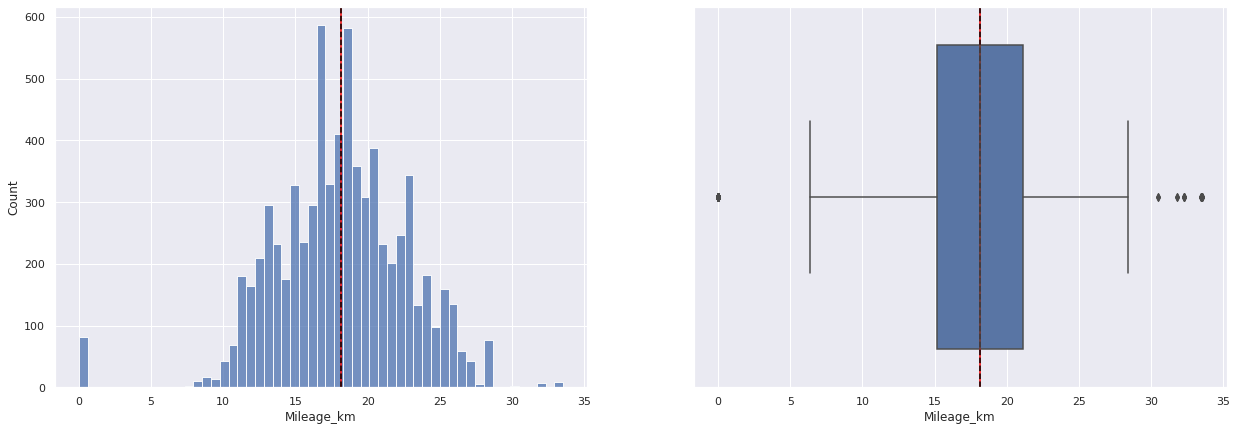

In [ ]:
# set figure size
plt.figure(figsize=(21, 7))

# use a subplot for side by side comparison
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Mileage_km')
# add lines to indicate mean & median for histogram
plt.axvline(df['Mileage_km'].mean(), color='red', linestyle='-')  
plt.axvline(df['Mileage_km'].median(), color='black', linestyle='--')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Mileage_km')
# add lines to indicate mean & median for boxplot
plt.axvline(df['Mileage_km'].mean(), color='red', linestyle='-')  
plt.axvline(df['Mileage_km'].median(), color='black', linestyle='--')

plt.show()

- Right away we can see that the mean and median are essentially on top of each other. The mean is indicated by the solid red line and then the median is the black dashed line on top of it.
- The data looks to have a normal distribution pattern. There are a few outliers to right, but they are not extreme in any way.  
- The zero values that we are trying to correct are more of an outlier than anything else.
- In this case given the normal distribution shape as well as the mean and median being almost identical, I am going to use the mean to impute these values.

In [ ]:
# To impute these zero values with the mean use the replace method
df['Mileage_km'] = df['Mileage_km'].replace(0.0, df['Mileage_km'].mean())

In [ ]:
# We still have 2 np.nan values that we saw in our isnull().sum() check
# We can replace these values with the mean as well.
df['Mileage_km'] = df['Mileage_km'].replace(np.nan, df['Mileage_km'].mean())

In [ ]:
df['Mileage_km'].describe()

count    7253.000000
mean       18.344238
std         4.134104
min         6.400000
25%        15.400000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage_km, dtype: float64

In [ ]:
df['Mileage_km'].isnull().sum()

0

- The minimum value is no longer zero and there are no more missing values.

###Engine

In [ ]:
df['Engine'].nunique()

150

- There are 150 different engine types
- The engine type is listed as an object type variable, but we can strip the 'CC' portion away to get just the number and make it numeric.

In [ ]:
# We can use the same method we used to remove km units
def eng_to_num(eng_val):
    """
    This func. takes in a str of enigne in CC and converts 
    it to a number. '998 CC' becomes 998. We did see some 
    missing values, NaN, for these the func. returns np.nan.
    """
    if isinstance(eng_val, str):
        if eng_val.endswith('CC'):
          return float(eng_val.replace('CC', ''))
    else:
        return np.nan

In [ ]:
# Now we apply the function
df['Engine_CC'] = df['Engine'].apply(eng_to_num)
df[['Engine_CC', 'Engine']].head()

,Engine_CC,Engine
0,998.0,998 CC
1,1582.0,1582 CC
2,1199.0,1199 CC
3,1248.0,1248 CC
4,1968.0,1968 CC


- Just like with Mileage we have created a new column 'Engine_CC' to store the numeric values from the oringinal 'Engine' object column

In [ ]:
# Now we can drop the old 'Engine' column
df.drop('Engine', axis=1, inplace=True)
# We can also check the stats for our new numeric column
df['Engine_CC'].describe()

count    7207.000000
mean     1616.573470
std       595.285137
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine_CC, dtype: float64

- mean engine size is 1616 CC
- min is 72 CC and max is 5998 CC There seems to be a wide range of engine size amongst our dataset

In [ ]:
# engine did have some missing values let's take a look at those
df['Engine_CC'].isnull().sum()

46

- There are still 46 missing values we will need to deal with

###Let's make a histogram and boxplot for 'Engine_CC'

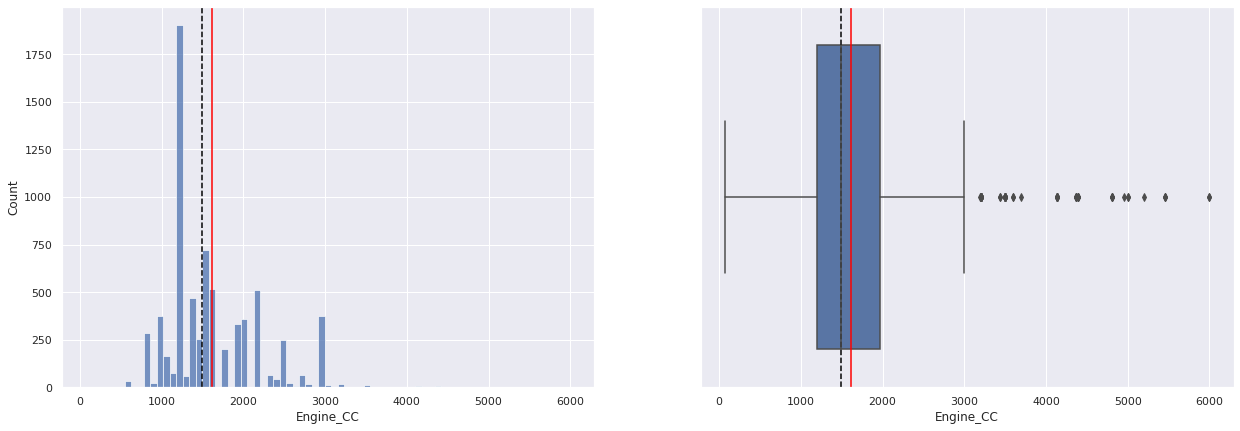

In [ ]:
# set figure size
plt.figure(figsize=(21, 7))

# use a subplot for side by side
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Engine_CC')
# add lines for mean & median
plt.axvline(df['Engine_CC'].mean(), color='red', linestyle='-')  
plt.axvline(df['Engine_CC'].median(), color='black', linestyle='--')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Engine_CC')
# add lines for mean & median to boxplot
plt.axvline(df['Engine_CC'].mean(), color='red', linestyle='-')  
plt.axvline(df['Engine_CC'].median(), color='black', linestyle='--')

plt.show()

- The distribution is right skewed with a decent amount of outliers having over 3000 CC engines.
- To replace these missing values it would be best to use the median as the mean is heavily affected by the outliers which are creating the right skew

In [ ]:
# There are 46 np.nan values for 'Engine_CC'
# We can replace these values with the median using the replace method
df['Engine_CC'] = df['Engine_CC'].replace(np.nan, df['Engine_CC'].median())

In [ ]:
df['Engine_CC'].isnull().sum()

0

- We no longer have any missing values for 'Engine_CC'

##Power

- Power is similiar to 'Mileage' and 'Engine' as it is a number but the units of measurement are causing it to be treated as an object.
- We will strip the units away and crete a new column in the same way.

In [ ]:
# removing bhp to get a numeric variable
def pow_to_num(pow_val):
    """
    This func. works like the others. Taking the str and removing 
    'bhp' to create a numeric variable. 58.16 bhp becomes 58.16 
    Power has missing values so the func. will turn NaNs into np.nan
    """
    if isinstance(pow_val, str):
        if pow_val.endswith('bhp'):
          return float(pow_val.replace('bhp', ''))
    else:
        return np.nan

In [ ]:
# Let's apply the function
df['Power_bhp'] = df['Power'].apply(pow_to_num)
df[['Power_bhp', 'Power']].head()

,Power_bhp,Power
0,58.16,58.16 bhp
1,126.20,126.2 bhp
2,88.70,88.7 bhp
3,88.76,88.76 bhp
4,140.80,140.8 bhp


- Just as with 'Mielage' and 'Engine', we now have a new colun with a numeric version of 'Power'.
- Also as we did with the others, we can drop the original column.

In [ ]:
# Drop original 'Power' column
df.drop('Power', axis=1, inplace=True)

In [ ]:
# Now we can see the stats for our new numeric column
df['Power_bhp'].describe()

count    7078.000000
mean      112.765214
std        53.493553
min        34.200000
25%        75.000000
50%        94.000000
75%       138.100000
max       616.000000
Name: Power_bhp, dtype: float64

- There is a mean power of 112 bhp
- min is 34 bhp, while max is 616 bhp
- It seems we may have some outliers seeing as the 75th percentil is only 138 bhp which leaves a big gap between there and the max of 616 bhp.
- The count being only 7,078 shows us that we have missing values.

###Let's make a histogram and boxplot for 'Power_bhp'

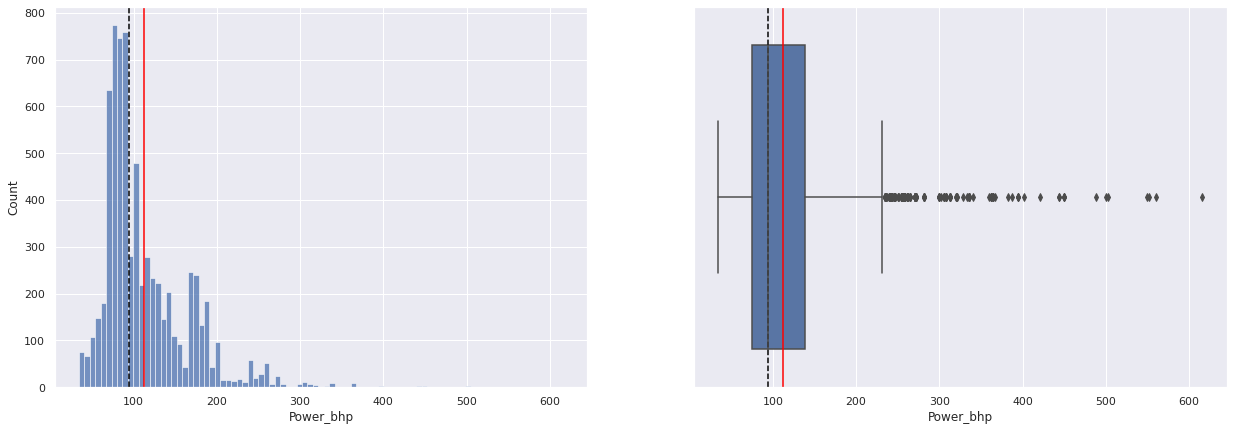

In [ ]:
# set size
plt.figure(figsize=(21, 7))

# use a subplot format
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Power_bhp')
# mean & median lines for easy readability
plt.axvline(df['Power_bhp'].mean(), color='red', linestyle='-')  
plt.axvline(df['Power_bhp'].median(), color='black', linestyle='--')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Power_bhp')
# mean & median lines boxplot
plt.axvline(df['Power_bhp'].mean(), color='red', linestyle='-')  
plt.axvline(df['Power_bhp'].median(), color='black', linestyle='--')

plt.show()

- There is a long right tail on the histogram showing the skewness and the boxplot just confirms how right skewed the data is by showing how many outliers there really are.
- This has a clear effect on the mean value.
- The median value would be best for imputing the missing values in this case.

In [ ]:
df['Power_bhp'].isnull().sum()

175

In [ ]:
# There are 175 np.nan values for 'Power_bhp'
# We will impute these values with the median
df['Power_bhp'] = df['Power_bhp'].replace(np.nan, df['Power_bhp'].median())

In [ ]:
df['Power_bhp'].isnull().sum()

0

- We no longer have any missing values for 'Power_bhp'

##Seats

In [ ]:
df['Seats'].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

- Most of the used cars being sold have 5 seats, which I would expect to be your standard sedan/SUV with 2 front seats and a 3 seat bench for the back seat.
- 7 seats is the next highest which I would imagine to be mini-vans and larger 2 row SUVs, with 2 front seats, 2 separated middle seats, and then a 3 seat bench in the back.
- The other seating amounts have much lower counts as they will most likely be a more specialized or less popular vehicle style.
- There is 1 vehicle showing a count of zero seats.  I would guess this is a mistake as I don't think we can have a vehicle with zero seats.
- We know from our original missing value check that there are 53 vehicles missing entries for seats, so I will assume this value was missing as well but just got recorded as a zero instead.

###Let's make a histogram and boxplot for Seats

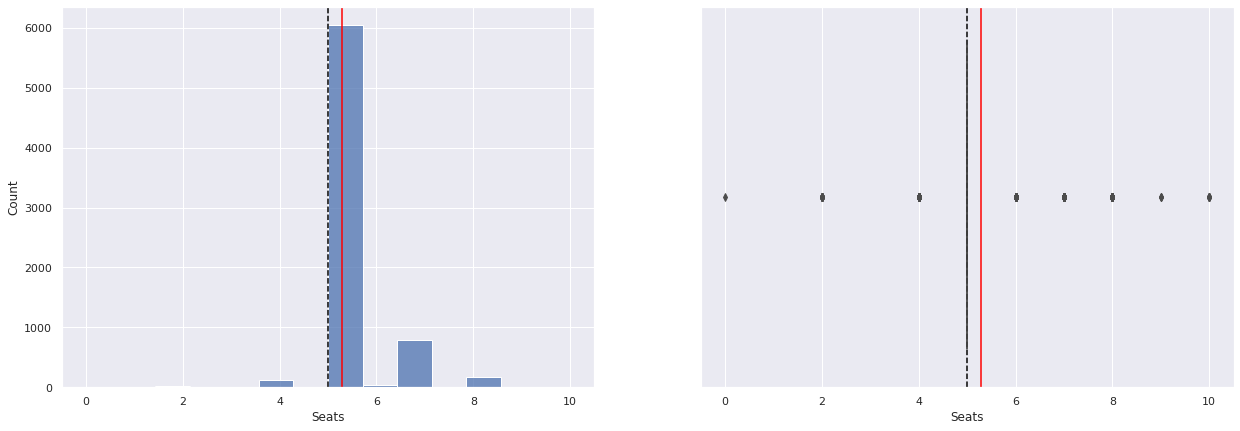

In [ ]:
# size
plt.figure(figsize=(21, 7))

# subplot
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Seats')
# show mean & median
plt.axvline(df['Seats'].mean(), color='red', linestyle='-')  
plt.axvline(df['Seats'].median(), color='black', linestyle='--')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Seats')
# show mean & median
plt.axvline(df['Seats'].mean(), color='red', linestyle='-')  
plt.axvline(df['Seats'].median(), color='black', linestyle='--')

plt.show()

- The data seems to be somewhat right skewed, but it is hard to tell as there are outliers in both directions.
- Because of the spread of the values so concentrated at 5 and so few categories of seat smounts, our boxplot isn't even properly visible.  It just shows everything outside of 5 as an outlier in both directions.
- Based on these results it may be better to treat it as a categorical variable but we will wait and see.
- Since there are outliers median would be the best choice for imputing the missing values.

In [ ]:
df['Seats'].isnull().sum()

53

In [ ]:
# There are 53 np.nan values for 'Seats'
# We will impute these values with the median
df['Seats'] = df['Seats'].replace(np.nan, df['Seats'].median())

In [ ]:
df['Seats'].isnull().sum()

0

- Now there are no longer any missing values for 'Seats'
- But there is still a zero value of zero which we need to impute with the median as well.

In [ ]:
# Let's check our 0 seat entry to make sure it's an inncorrect value
seat_zero = df[(df.Seats <= 0)]
seat_zero

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Car_Make,Car_Model,Mileage_km,Engine_CC,Power_bhp
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,0.0,53.14,18.0,Audi,A4 3.2 FSI Tiptronic Quattro,10.5,3197.0,94.0


- I did some outside research just to verify and this vehichle comes in 4 or 5 seat variations, but definitely not zero seats.
- So using the median of 5 will work to impute this missing value as well.

In [ ]:
# We will use the same replace method but with zero instead of np.nan
df['Seats'] = df['Seats'].replace(0, df['Seats'].median())

In [ ]:
df['Seats'].value_counts()

5.0     6101
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64

- The count for 5 seats has increased because of the values we imputed
- There is no longer a vehicle listed with zero seats

##New_Price

###Let's make a histogram and boxplot for 'New_Price'

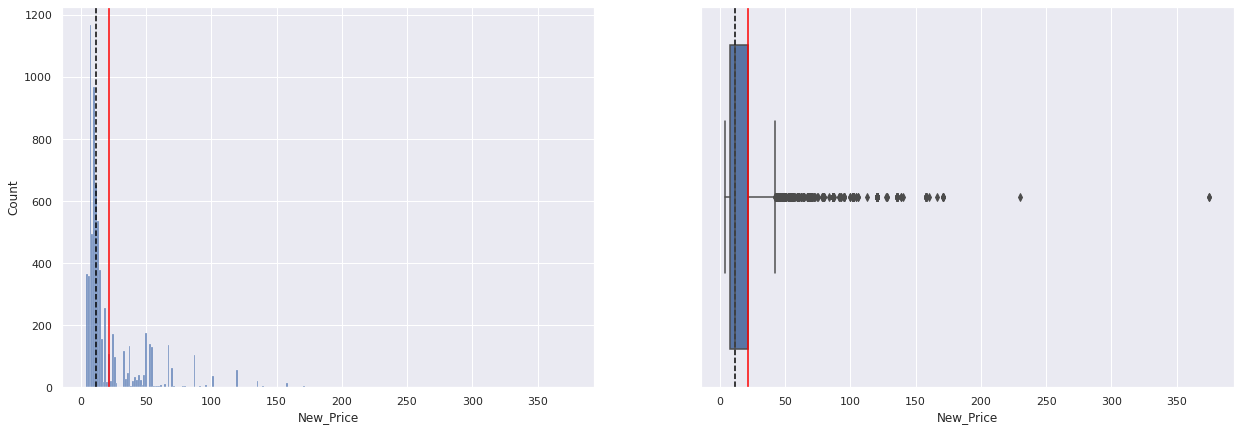

In [ ]:
# size
plt.figure(figsize=(21, 7))

# subplot
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='New_Price')
# show mean & median
plt.axvline(df['New_Price'].mean(), color='red', linestyle='-')  
plt.axvline(df['New_Price'].median(), color='black', linestyle='--')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='New_Price')
# show mean & median
plt.axvline(df['New_Price'].mean(), color='red', linestyle='-')  
plt.axvline(df['New_Price'].median(), color='black', linestyle='--')

plt.show()

- The new price for the majority of models is less than 25 INR Lakhs
- There are many outliers though that go well beyond this price though, and even 2 major outliers 1 being over 200 INR Lakhs and another over 350 INR Lakhs.
- The presence of all these outliers shows that the data is heavily right skewed.
- We may need to look at some of these extra large outliers to see if there might be any mistakes.

In [ ]:
# Let's check out these extreme outliers
np_out = df[(df.New_Price >= 200)]
np_out

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Car_Make,Car_Model,Mileage_km,Engine_CC,Power_bhp
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,5.0,230.0,160.0,Land Rover,Rover Range Rover 3.0 Diesel LWB Vogue,13.33,2993.0,255.0
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,4.0,375.0,59.0,Bentley,Continental Flying Spur,8.60,5998.0,552.0
6354,Bentley Flying Spur W12,Bangalore,2008,31200,Petrol,Automatic,Second,5.0,375.0,NaN,Bentley,Flying Spur W12,10.20,5998.0,616.0


- Doing some outside research confirmed that these prices are indeed accurate, and not mistakes.
- They may be extreme outliers, but the brand new original pricing is accurate.
- The more concerning part is the used sale prices. The Bentley Continental Flying Spur with a new price of 375 INR Lakhs sold for only 59 INR Lakhs.  While I suppose this is possible since the vehicle is a 2006 model, it still seems like a big difference, especially with it being sold by the 1st owner and having only 48,000 Kilometers Driven.  Let's keep this in mind as we look at some of the used pricing data.
- The other Bentley on this list, the Bentley Flying Spur W12 is missing its used sale price

##Price

- Our final variable to look at is price, this being the price at which the used vehicle was sold.
- This will be our dependant/targer variable, as the price for used cars is what we want our model to predict.

###Let's make a histogram and boxplot for 'Price'

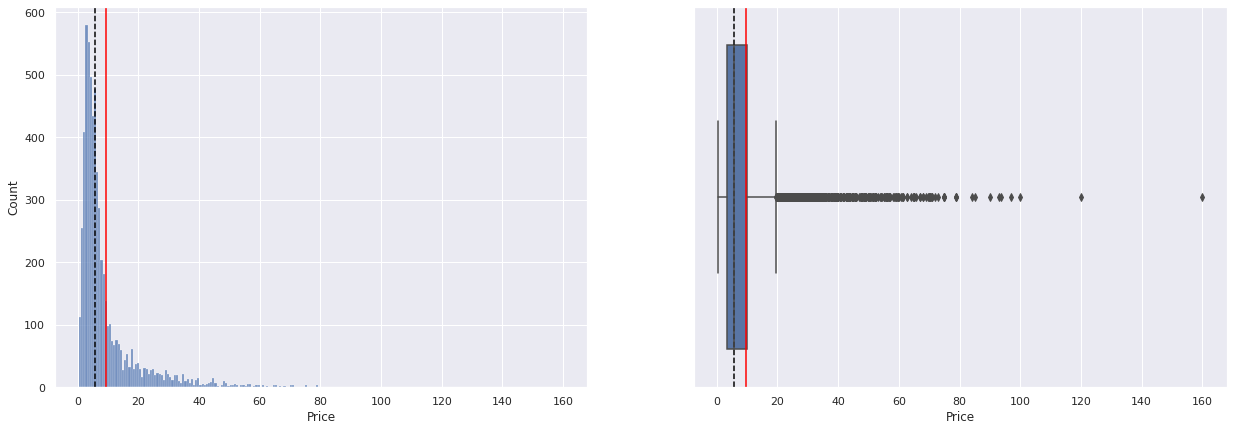

In [ ]:
# size
plt.figure(figsize=(21, 7))

# subplot
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Price')
# show mean & median
plt.axvline(df['Price'].mean(), color='red', linestyle='-')  
plt.axvline(df['Price'].median(), color='black', linestyle='--')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Price')
# show mean & median
plt.axvline(df['Price'].mean(), color='red', linestyle='-')  
plt.axvline(df['Price'].median(), color='black', linestyle='--')

plt.show()

- These look very similiar to the histogram and boxplot for 'New_Price',
but the largest outlier sits at 160 INR Lakhs instead of 375.
- So while the distribution is similiar and both are heavily right skewed, the scale is less than half that of 'New_Price'

In [ ]:
# Let's see if the outliers here coordinate with the 'New_Price' outliers
p_out = df[(df.Price >= 100)]
p_out

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Car_Make,Car_Model,Mileage_km,Engine_CC,Power_bhp
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,5.0,230.000,160.0,Land Rover,Rover Range Rover 3.0 Diesel LWB Vogue,13.33,2993.0,255.0
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,2.0,11.300,120.0,Lamborghini,Gallardo Coupe,6.40,5204.0,560.0
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,2.0,69.675,100.0,Jaguar,F Type 5.0 V8 S,12.50,5000.0,488.1


- The Land Rover is the highest outlier in 'Price' and is one of the highest outliers we saw in 'New_Price', so this matches as expected.
- The other thing I notice here is that 2 of these high 'Price' outliers sold for significantly more than the 'New_Price' of those vehicles.
- I know that some cars can be a limited edition or discontinued, which can increase their resell value but the Lamborhini Gallardo listed above shows a new price of only 11.3 INR Lokhs (roughly just over 14,000 USD) and resold used, from the 3rd owner, for 120 INR Lakhs (around 150,000 USD). That means it's resell value increased by more than 10 times the original purchase price. 
- There are special circumstances but without more information I feel like this may have a negative impact on our model's predictability.  My outside research shows that 120 INR Lakhs could be a realistic resale price for the car, but 11.3 INR Lakhs doesn't make any sense for the new price from all the outside research I have done.
- The Jaguar also has a fairly big iincrease in price from its new price of almost 70 INR Lakhs to its resell price of 100 INR Lakhs.
- We will need to investigate this phenomenon further in order to make sure we are using the best data available for our model.

In [ ]:
price_greater = df[(df.Price) > (df.New_Price)]

In [ ]:
price_greater.shape

(73, 15)

- There are 73 sales records in which the data shows the car being sold used for a higher price than it was when it was new.
- Sometimes cars do appreciate in value and sell for more, but it is not a common occurrence.  
- Though 73 out of 7253 is a relatively reasonable amount for this occurence, given the size of the dataset, but I would still like to investigate this further.

In [ ]:
price_greater.head(8)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Car_Make,Car_Model,Mileage_km,Engine_CC,Power_bhp
21,Maruti S Cross DDiS 200 Alpha,Bangalore,2015,55392,Diesel,Manual,Second,5.0,7.880,8.25,Maruti,S Cross DDiS 200 Alpha,23.65,1248.0,88.5
392,Mercedes-Benz S Class 2005 2013 S 350 CDI,Coimbatore,2017,56451,Diesel,Automatic,First,5.0,49.490,62.81,Mercedes-Benz,S Class 2005 2013 S 350 CDI,13.50,2987.0,282.0
431,Maruti Baleno Alpha Automatic,Coimbatore,2018,12831,Petrol,Automatic,First,5.0,8.800,9.89,Maruti,Baleno Alpha Automatic,21.40,1197.0,83.1
655,Jaguar XJ 2.0L Portfolio,Mumbai,2017,10501,Petrol,Automatic,First,5.0,69.675,75.00,Jaguar,XJ 2.0L Portfolio,9.43,1999.0,237.4
693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,2.0,49.490,55.54,Mercedes-Benz,SLK-Class SLK 350,18.10,3498.0,306.0
728,Maruti S Cross DDiS 200 Sigma Option,Pune,2017,32000,Diesel,Manual,First,5.0,7.880,8.50,Maruti,S Cross DDiS 200 Sigma Option,15.00,1248.0,88.5
797,Maruti SX4 S Cross DDiS 200 Zeta,Mumbai,2017,26000,Diesel,Manual,First,5.0,7.880,9.75,Maruti,SX4 S Cross DDiS 200 Zeta,23.65,1248.0,88.5
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000,Petrol,Automatic,First,2.0,49.490,55.00,Mercedes-Benz,SLK-Class SLK 350,18.10,3498.0,306.0


- I have price_greater.head() set to 8 to save space but I did take a look at the whole list.
- I belive some increases are possible but several I saw when checking the whole list just looked like excessive increases, so I want to look further at the entries with the larger differences.

In [ ]:
# Filtering price_greater for the larger differences
# Let's look for cars selling 15 INR Lakhs above the new price
# For my reference 15 INR Lakhs is about 19,000 USD  
price_greater_diff = df[(data.Price - df.New_Price) > 15]
price_greater_diff

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Car_Make,Car_Model,Mileage_km,Engine_CC,Power_bhp
4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,2.0,49.490,90.0,Mercedes-Benz,SLK-Class 55 AMG,12.00,5461.0,421.00
5535,BMW X6 xDrive 40d M Sport,Ahmedabad,2015,97003,Diesel,Automatic,First,5.0,55.070,85.0,BMW,X6 xDrive 40d M Sport,15.87,2993.0,308.43
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,2.0,11.300,120.0,Lamborghini,Gallardo Coupe,6.40,5204.0,560.00
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,2.0,69.675,100.0,Jaguar,F Type 5.0 V8 S,12.50,5000.0,488.10


- There are 4 vehicles in the data set that sold for a price greater than 15 INR Lakhs higher than their new price.
- The Mercedes-Benz SLK-Class 55 AMG 2014 model sold used, from the 2nd owner, at a price of 90 INR Lakhs. This is over 40 Lakhs higher than the car's original price, brand new at 49.49 Lakhs. This is an increase of a little over 50,000 USD more than the original price of the car this is an increase of 80%.
- The BMW X6 xDrive 40d M Sport 2015 model sold used, from the first owner, at 30 INR Lakhs over the original price. This is an appreciation value of almost 38,000 USD, which in this case is an increase of over 50% its brand new price.
- While these two vehichles may be accurately recorded sales records that just happen to be extreme outliers, I believe the Lamborghini Gallardo Coupe pricing info has got to be a data collection error.
- According to the data entry The Lamborghini sold brand new for 11.3 INR Lakhs. This is 14,150 USD. Outside research shows the lowest price MRSP for this vehicle brand new in 2011 was 149.3 INR Lakhs (187,000 USD). This is certainly an error and this entry will need to be removed. The used selling price of 120 INR Lakhs seems reasonable, but with the new sale price so inaccurate this entry is more of a liability to our model.
- The Jaguar F Type in this selection sold used for 30 INR Lakhs over its original new price of approximately 70 INR Lakhs which is a 43% increase.  This is also highly unusual for the sale price of a used car.
- As of now I am only going to drop the Lamborghini Gallardo Coupe entry, but I will keep these other 3 extreme outlier entries in mind as I build my model, as I may want to reconsider dropping them in the future to see if it improves the model's performance.

In [ ]:
# dropping the entry for the Lamborghini Gallardo Coupe
df.drop(5781, axis=0, inplace=True)

In [ ]:
# Checking to see the row was dropped correctly
df_price_diff = df[(df.Price - df.New_Price) > 15]
df_price_diff

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Car_Make,Car_Model,Mileage_km,Engine_CC,Power_bhp
4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,2.0,49.490,90.0,Mercedes-Benz,SLK-Class 55 AMG,12.00,5461.0,421.00
5535,BMW X6 xDrive 40d M Sport,Ahmedabad,2015,97003,Diesel,Automatic,First,5.0,55.070,85.0,BMW,X6 xDrive 40d M Sport,15.87,2993.0,308.43
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,2.0,69.675,100.0,Jaguar,F Type 5.0 V8 S,12.50,5000.0,488.10


- We can see the Lamborghini Gallardo Coupe was dropped correctly, leaving this list of 3 for future condiderations.

### Missing Values in 'Price'

- 'Price' has the greatest number of missing values at 1,234.
- As this is our dependent/target variable I believe it would be best to drop the entries which have missing values for 'Price' as with this many missing values, imputing them with the median may have a significant impact on our model's ability to predict pricing.
- I am going to make a copy of our at this point in case we want to use the data without all the missing values for Price dropped.

In [ ]:
# creating a copy of our data at this point
df1 = df.copy()

In [ ]:
df1.dropna(subset=['Price'], axis=0, inplace=True)

In [ ]:
df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
New_Price            0
Price                0
Car_Make             0
Car_Model            0
Mileage_km           0
Engine_CC            0
Power_bhp            0
dtype: int64

- We no longer have any missing values in our dataset.

#Feature Engineering

- Using the car names had way to many unique values to use on a model, so I reduced it down to just vehichle Makes, which brought it down to 32.
- 32 is still a large number for dimensionality when it comes to a categorical variable, so a further way to reduce dimensionality would be condense the variable further.
- We can use binning to instead break cars down into price ranges. We will create seven classes and create a price range for each.

In [ ]:
# Using pd.cut to divide price into 7 bins
df1['Car_Price_Class'] = pd.cut(
    df1['Price'],[-np.inf,5,10,20,40,60,80,np.inf],
    labels=[
    'F_Class','E_Class','D_Class','C_Class',
    'B_Class','A_Class','S_Class'
    ]
)

df1['Car_Price_Class'].value_counts()

F_Class    2660
E_Class    1877
D_Class     793
C_Class     518
B_Class     126
A_Class      36
S_Class       8
Name: Car_Price_Class, dtype: int64

- F_class has the highest number of cars. All of these cars in F_Class sold for less than 5 INR lakhs (roughly 6,300 USD)
- E_Class is the next highest with cars selling used for anywhere between 5 - 10 INR Lakhs (roughly 6,300 - 12,550)
- There are only 8 cars in S_Class which sold used for over 80 INR Lakhs (Over 100,000 USD). These could be important data points but compared to the majority of used vehicles selling for 10 INR Lakhs or less they are extreme outliers that may affect the model.
- The main point here though is that we have reduced dimensionality from the original 2,041 unique names to 32 unique Makes/Brands to now only 7 price classes. This will prove very beneficial when running our model.

#Bivariate and Multivariate Analysis 

1st thing we can do for Bivariate analysis is to create a heatmap

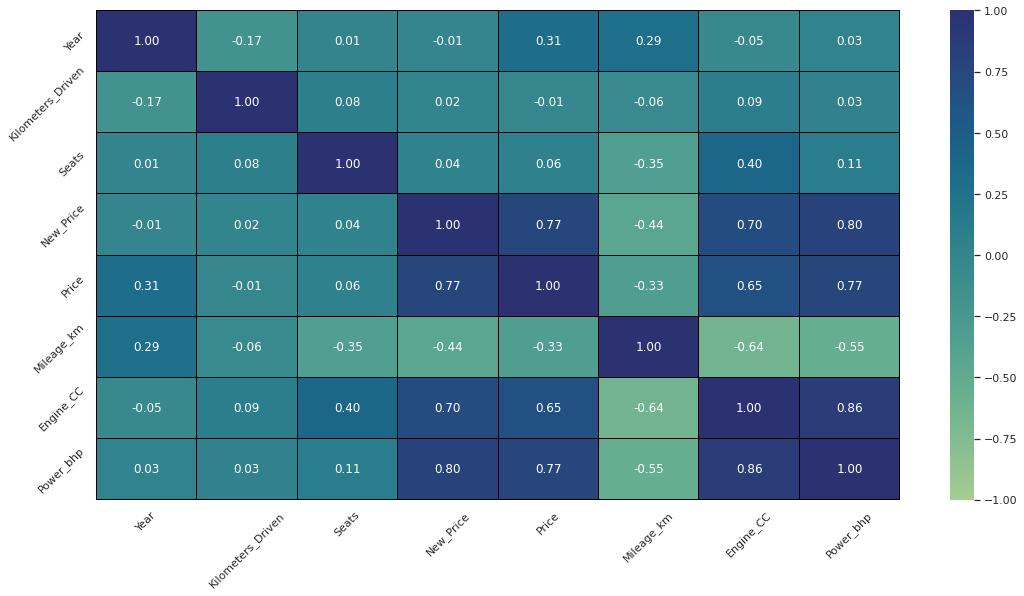

In [ ]:
# Set Size
plt.figure(figsize=(18, 9))
# creating heatmap and setting parameters
sns.heatmap(df1.corr(), annot=True, vmin= -1, vmax= 1, fmt='.2f', linewidths=0.05, linecolor='black', cmap='crest')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

- The highest correlation is between 'Engine_CC' and 'Power_bhp' at 0.86, which should be highly correlated because a bigger engine size will have more power.
- 'New_Price' and 'Power_bhp' have the 2nd highest correlation at 0.80, which makes sense that cars with higher horsepower would be more expensive. For example, sports cars are going to have have more bhp and cost more.
- Next strongest correlation is 'Power_bhp' and 'Price' at 0.77, which if new price and bhp are highly correlated than used price should be as well just to a lesser degree, which is what we see here.
- There is another correlation that is also 0.77, and that is between 'New_price' and 'Price', which we would expect since the car's original value brand new is definitely going to be a major determining factor in its used selling price.
- 'Engine_CC' has high correlations at 0.70 with 'New_Price' and 0.65 with 'Price'. We already saw that that 'Engine_CC' and 'Power_bhp' were highly correlated and 'Power_bhp' had high correlations with both new and used pricing, meaning 'Engine_CC' would be expected to have a high correlation with both prices as well.
- There is also 'Mileage_km' which has moderately negative correlations with both 'Engine_CC' at -0.64, and 'Power_bhp' at -0.55.  This is intuitive as the larger the engine and the higher the horsepower, the less mileage you will get out of your fuel. 
- More surprisingly though, was that the model 'Year' of the vehicle, 'Kilometers_Driven', and number of 'Seats', seemed to have no strong correlations with either 'Price' or 'New_Price'. The only one with some small correlation was 'Year' which had a correlation of 0.31 with the used selling 'Price'.

##We can also create a pairplot to get a visual representation or our heatmap using scatterplots

- Instead of just a direct translation of our heatmap to scatterplots, I want to also get a better look at our dependent/target variable, 'Price'.

- In order to do this, I will use 'Price' as the hue, allowing us to see what the selling price was for used cars based on the correlations between each variable in our heatmap.

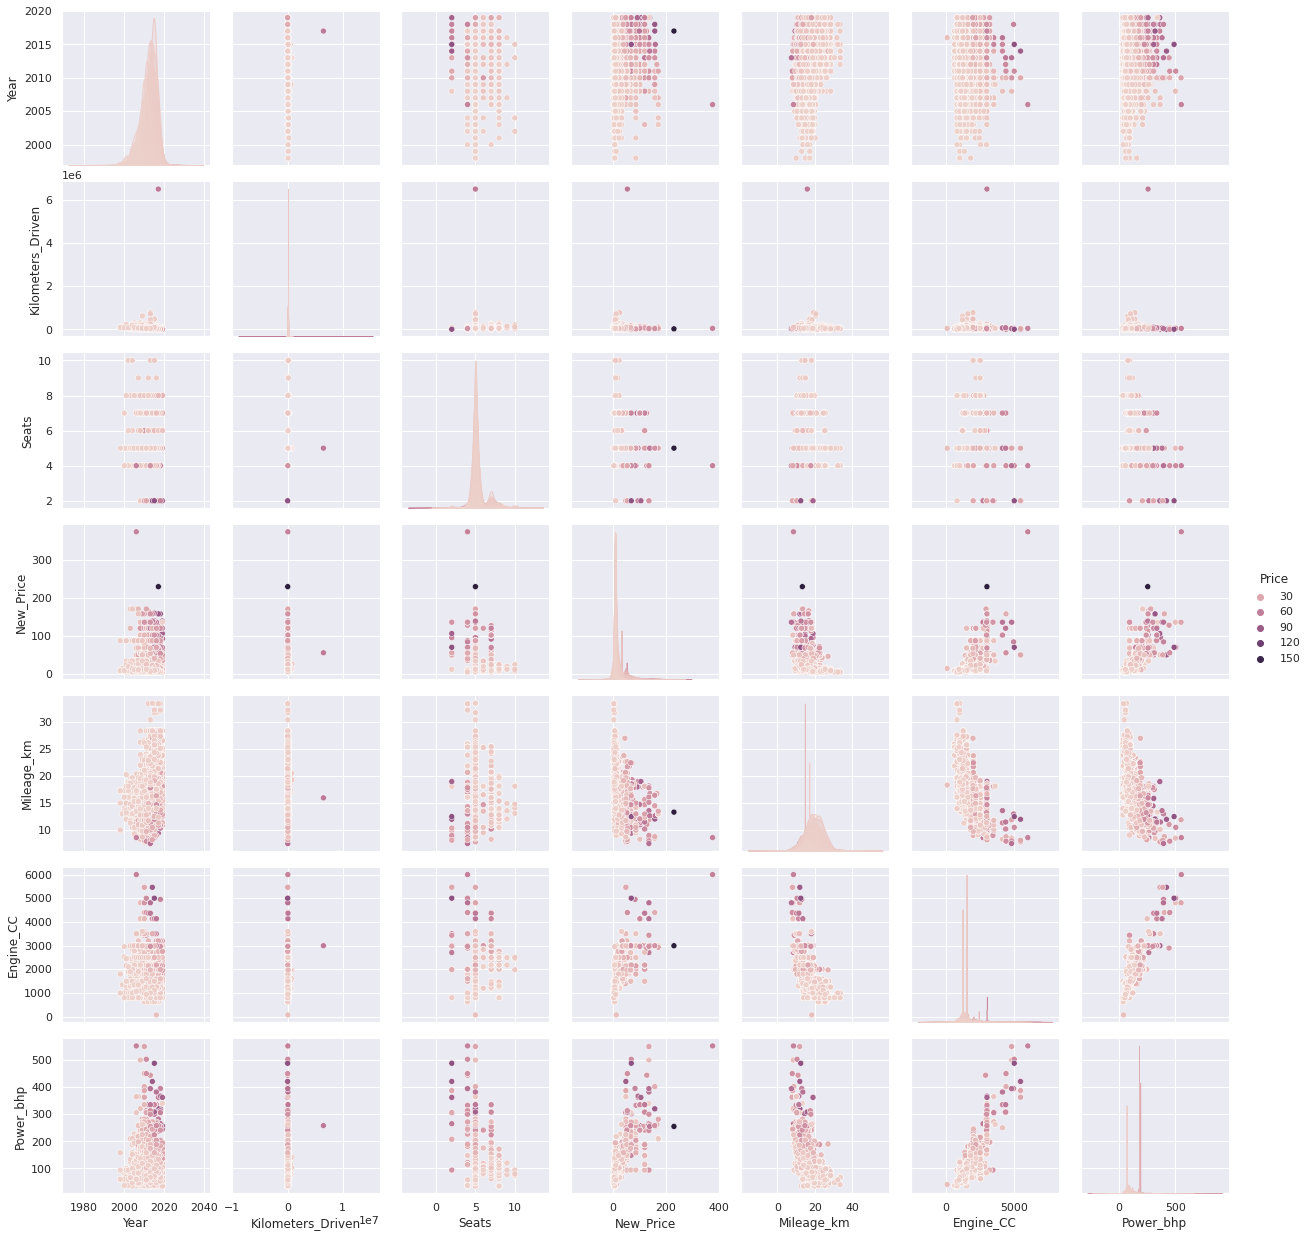

In [ ]:
# creates a scatter plot of the numeric variables same ones in the heatmap
# Instead of 'Price' being another variable on the grid it will be the hue
sns.pairplot(df1[[colname for colname in df1.columns]], hue='Price')
plt.show()

- Here we can see 'Price' respresented by bubble points along the correlation between each set of variables, with a key on the right showing the 'Price' value for each bubble color and size.
- We can see in the positive correlation between 'New_Price' and 'Power_bhp', that 'Price' amounts also increases along with the increases in 'New_Price' and 'Power_bhp', so all 3 are positively correlated.
- The strongest correlation is between 'Engine_CC' and 'Power_bhp', but now can see 'Price' laid over top and that increases as well showing that these 3 are all positively correlated and have the strongest positive correlation shown.
- 'Mileage_km' shows a negative correlation with 'Engine_CC' and 'Power_bhp', as 'Mileage_km' goes down, 'Engine_CC' and 'Power_bhp' increase, as well as the 'Price'.

##Let's see about looking at some of our categorical variables

##Location vs. Price

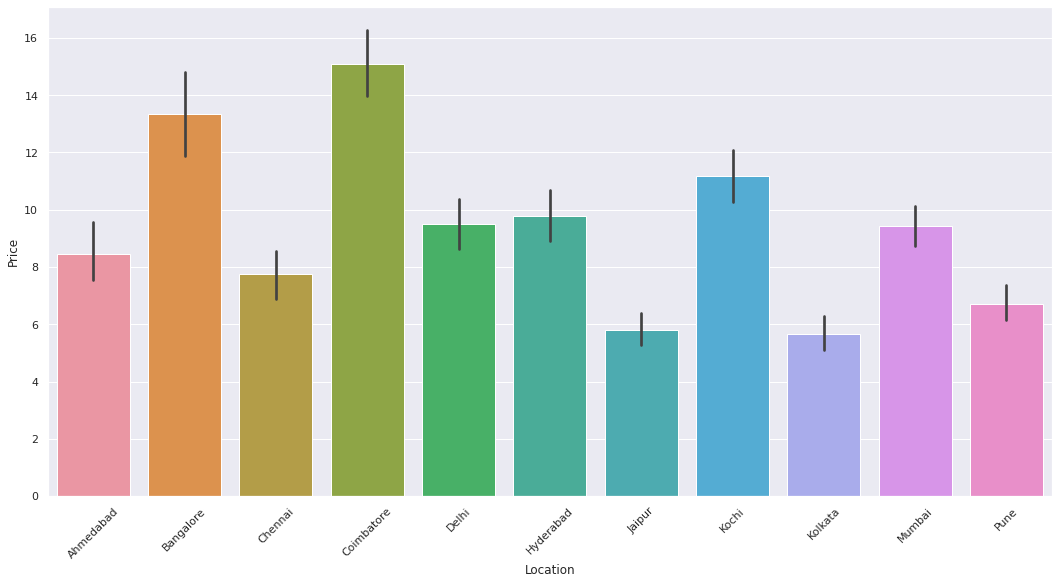

In [ ]:
plt.figure(figsize=(18,9))

sns.barplot(data=df1, y='Price', x='Location')
plt.xticks(rotation=45)
plt.show()

- Used car selling prices are highest in Coimbatore
- Bangalore was actually next to last in the count of used vehicle sales, but has the 2nd highest selling prices.
- Mumbai had the highest count of used vehicle sales, but it is roughly tied for 4th highest in selling prices.
- So there is definitely some variation in selling prices across the different locations but they most likely correlate with number of vehicles sold. Mumbai has the most sales but overall lower selling prices than other areas, but the mjority of used vehicles sold for less than 10 INR Lakhs so if you have more sales you will have higher amount of lower priced cars based on the numbers in our dataset.

##Price vs. Fuel_Type

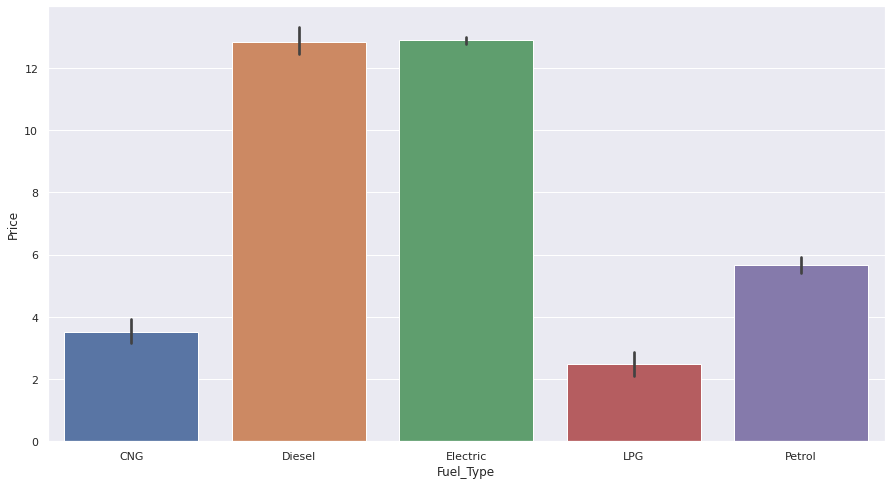

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(data=df1, y='Price', x='Fuel_Type')

plt.show()

- Used car selling prices are highest for Diesel vehichles, which was the fuel type for the majority of vehicles in the dataset.
- Petrol was the 2nd most common fuel with about half the amount of Diesel vehichles in the dataset, but petrol vehicles also sell for about half as much as Diesel.
- Electric vehicles are nearly tied with Diesel for the most expensive selling prices in the used car market, even though there are only 2 electric vehicles in the whole dataset. This will cause 'Fuel_Type' to have a negative affect on the accuracy of our model, and should not be included.

##Transmission vs. Price

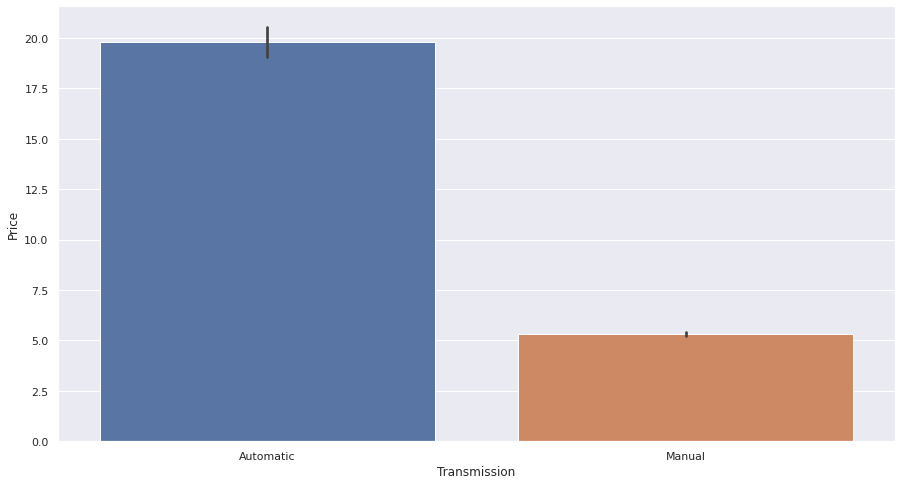

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(data=df1, y='Price', x='Transmission')

plt.show()

- We saw earlier that there were around 5k Manual transmission vehicles in the dataset while only around 2k Automatic vehicles, yet the Automatic vehicles seem to have a lot higher used selling price.

##Owner vs. Price

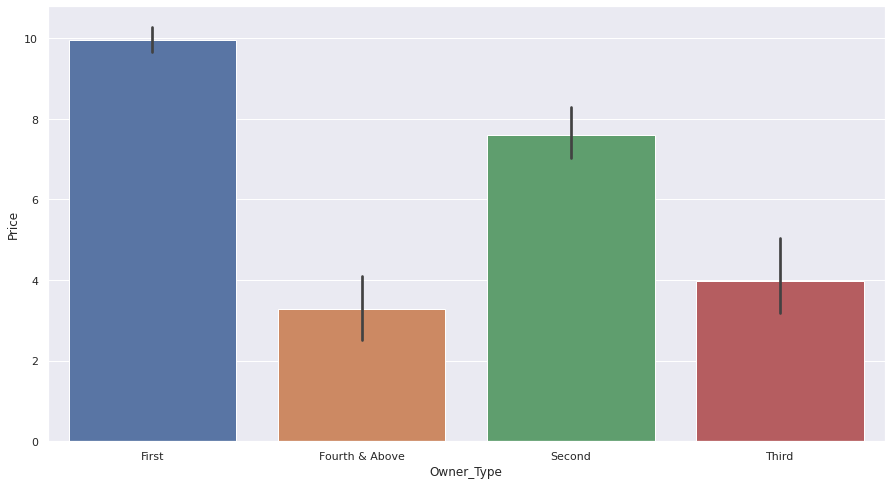

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(data=df1, y='Price', x='Owner_Type')

plt.show()

- This seems fairly straightforward and intuitive, Used cars from the 1st owner sell for the most, while each consecutive owner after that reduces the resale value.

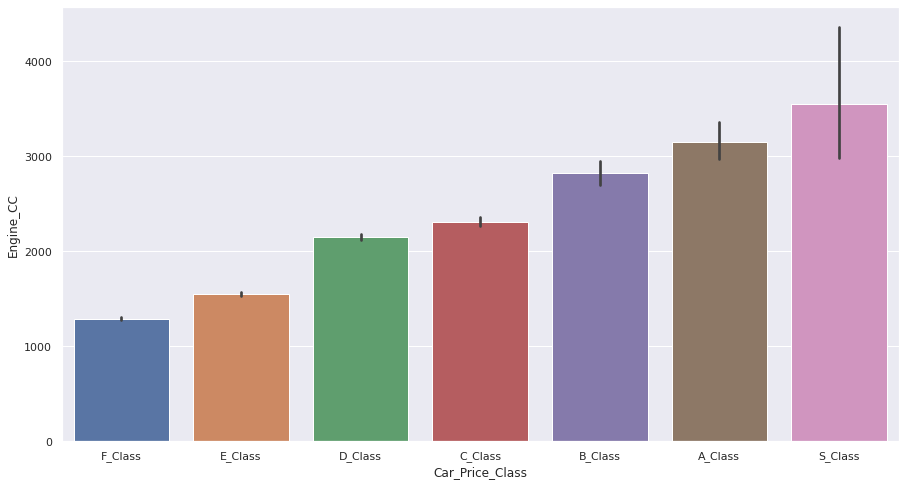

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(data=df1, y='Engine_CC', x='Car_Price_Class')

plt.show()

- We know that 'Price' and 'Engine_CC' are positively correlated, but looking at our 'Car_Price_Class' column we made there is a perfect stair step increase in enginesize from lowest price class to the highest.
- This also shows us that our Car Price Class bins seem to be very well proportioned in relation to the overall 'Price'.

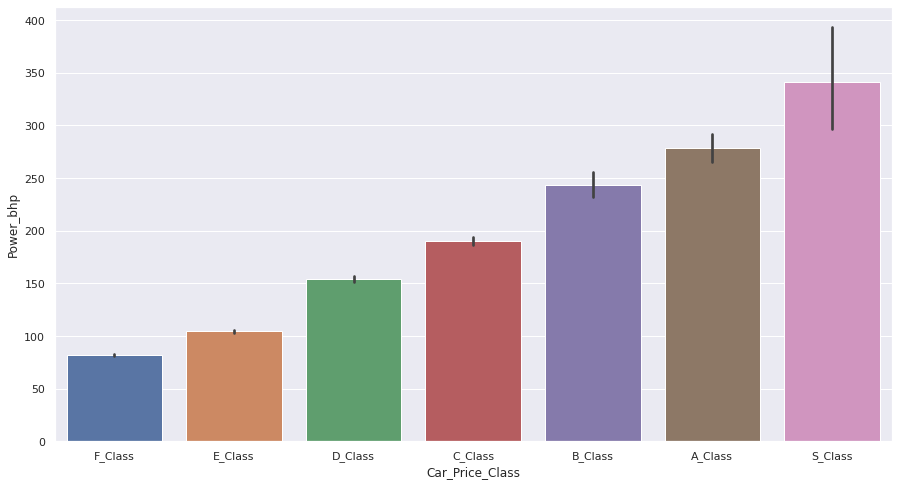

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot(data=df1, y='Power_bhp', x='Car_Price_Class')

plt.show()#

- As expected we see the same nice and neat stair step increase pattern across the Price Classes as 'Power_bhp' increases.

#Summary of Exploratory Data Analysis 

Looking at our data set we had sales recordes on 7,253 used vehicles sold in India's used car market. 
- There 2041 different types of cars sold across 11 different locations. With the highest amount of used cars being sold in Mumbai.  
- The years of the car models being sold range from 1996 to 2019, with the majority being between 2012 - 2017, and 2015 being the model year with highest sales count in the data.
- There are 5 Fuel types, but Diesel and Petrol make up nearly all of the vehichles with only a fraction having other fuel types. Diesel vehichles sell for double the amount of Petrol vehicles.
- There are only 2 transmission types Manual and Automatic. The majority of cars are Manual, but Automatic transmission cars sell for over double the price of Manual.
- We have data on 4 owners from 1st to 4th in our data with most being sold by the 1st owner and selling for the highest amount which you'd expect.
- Analysis show that there is a high correlation with Engine Size and Horse Power which makes sense, but data shows that both new and used price are alos positively correlated with enigine size and power.
- We have data on the amount of seats with most having 5 seats, but seats did not seem to have much correlation with the price.
- We have information on the total kilometers driven which you would think would have an affect on the used selling price but there was not any correlation amongst the data.
- The data on mileage of km per fuel type had a negative correlation with Engine size, Horse Power, New Price and Price.  As the engine size increase, power increases which both of these factors will cause the car to get less mileage per measurement of fuel type. Cars with larger more powerful engines are more expensive which explains Mileage's negative correlation with both New and used price.

Overall there is a lot of data here but from our exploratory data analysis it seems that engine size and horse power are 2 of the biggest determining factors in a car's used selling price. The New price of the car also plays a big role as well as if it was the 1st owner or not. Then year model does have some affect on used price but to a much lesser degree. It is harder to tell the direct affect or importance of the other variables, but hopefully our model will be able to make sense of that.

#Outlier Treatment

- Now we need to take a look at any possible outliers and see if they are important data points or if there are extremes that will hurt our model accuracy.
- 1st thing is to make a copy that way if we need to compare without treating or dropping outliers we will have that option.

In [ ]:
# making copy of data
df2 = df1.copy()

In [ ]:
# creating a list of all numeric columns
num_cols = df2.select_dtypes(include=np.number).columns.tolist()
num_cols

['Year',
 'Kilometers_Driven',
 'Seats',
 'New_Price',
 'Price',
 'Mileage_km',
 'Engine_CC',
 'Power_bhp']

- We can remove a few of these columns which we aren't concerned about for outliers.
- Columns like 'Year', 'Seats', and 'Mileage_km' are not really prone to outliers based on the nature of their data, and any distant points would be considered important data points.

In [ ]:
# removing columns where outliers aren't a concern
num_cols.remove('Seats')
num_cols.remove('Year')
num_cols.remove('Mileage_km')
num_cols

['Kilometers_Driven', 'New_Price', 'Price', 'Engine_CC', 'Power_bhp']

- Now we can take a look out what outliers we may have in these columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

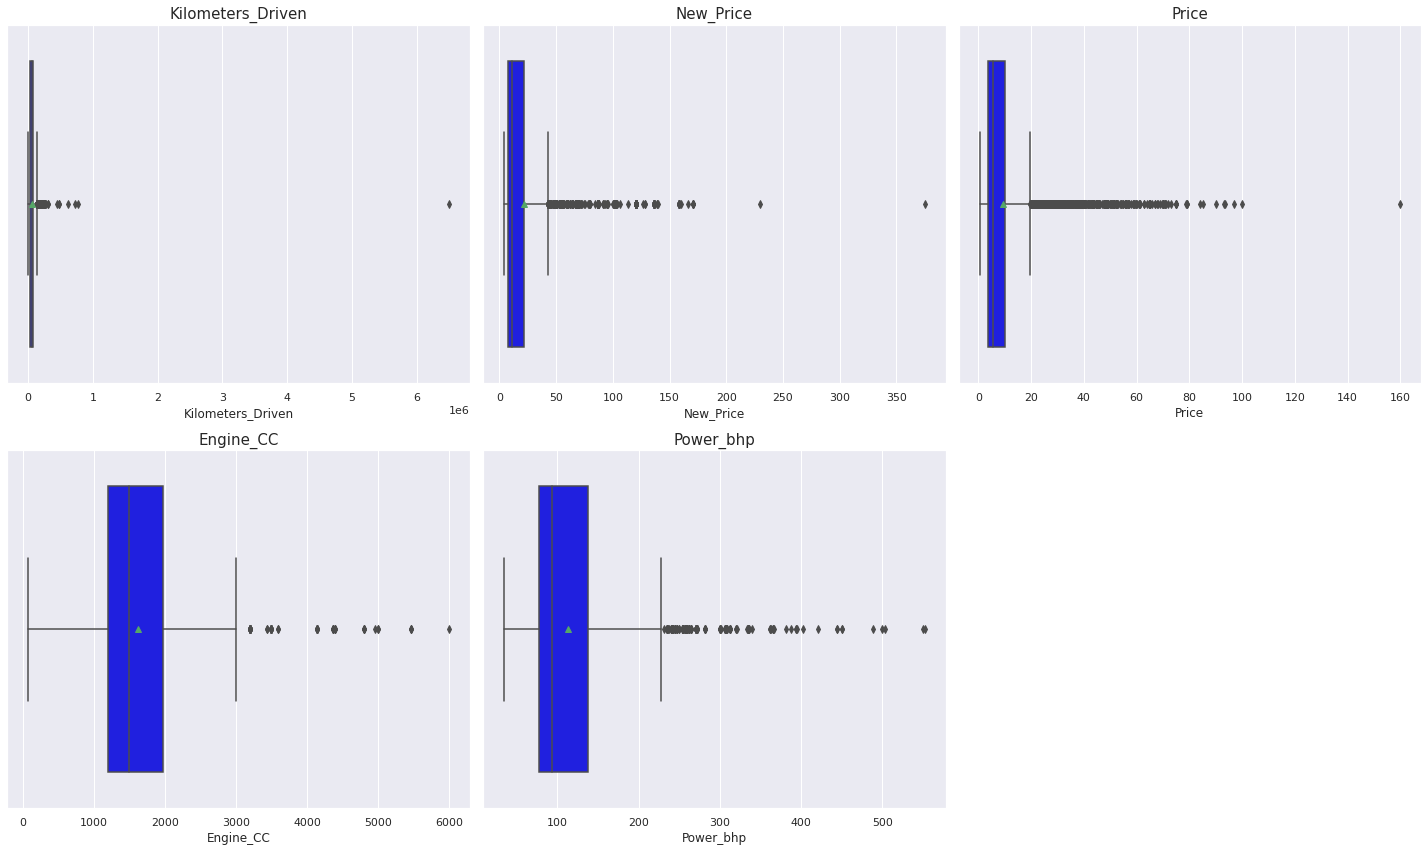

In [ ]:
plt.figure(figsize=(20,12))
for i in range(len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(df2[num_cols[i]],showmeans=True, color='blue')
    plt.tight_layout()
    plt.title(num_cols[i],fontsize=15)

plt.show()

- We definietly have outliers with all of these columns, but it is hard to know which are important data points and what are harmful to our model's accuracy.
- For this reason we should try to run the model with and with out treating outliers, and compare performance.
- We will first run it with out treating any of these outliers and see how it performes.


# Model Building

###1st thing we need to do is import the proper libraries for building our model

In [ ]:
# In order to split the data into train and test
from sklearn.model_selection import train_test_split

# In order to build our Linear Regression Model
from sklearn.linear_model import LinearRegression

# In order to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

###Let's define our Independent and Dependent variables for the model

In [ ]:
# We do not need any of these variables for our model
X = df1.drop(['Price', 'Name', 'Fuel_Type', 'Car_Make', 'Car_Model'], axis=1)
y = df1['Price']

###Next Let's Get Dummy Variables for our object and category columns

In [ ]:
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)
X.head()

,Year,Kilometers_Driven,Seats,New_Price,Mileage_km,Engine_CC,Power_bhp,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Car_Price_Class_E_Class,Car_Price_Class_D_Class,Car_Price_Class_C_Class,Car_Price_Class_B_Class,Car_Price_Class_A_Class,Car_Price_Class_S_Class
0,2010,72000,5.0,5.51,26.60,998.0,58.16,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,16.06,19.67,1582.0,126.20,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
2,2011,46000,5.0,8.61,18.20,1199.0,88.70,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,11.27,20.77,1248.0,88.76,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,2013,40670,5.0,53.14,15.20,1968.0,140.80,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
X.shape

(6018, 27)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6018 non-null   int64  
 1   Kilometers_Driven          6018 non-null   int64  
 2   Seats                      6018 non-null   float64
 3   New_Price                  6018 non-null   float64
 4   Mileage_km                 6018 non-null   float64
 5   Engine_CC                  6018 non-null   float64
 6   Power_bhp                  6018 non-null   float64
 7   Location_Bangalore         6018 non-null   uint8  
 8   Location_Chennai           6018 non-null   uint8  
 9   Location_Coimbatore        6018 non-null   uint8  
 10  Location_Delhi             6018 non-null   uint8  
 11  Location_Hyderabad         6018 non-null   uint8  
 12  Location_Jaipur            6018 non-null   uint8  
 13  Location_Kochi             6018 non-null   uint8

- We can see from X.head() that all object and category variable have been changed to have dummy variables, listing them out with 0, or 1, which increased our amount of columns to 27 as shown in the X.shape.
- X.info() shows us a listing of all the new columns and confirms that the we no longer have any object data types.

###Now we are ready to split our data into train and test sets

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

###Let's check on the shape of our train and test data

In [ ]:
print('There are', X_train.shape[0], 'rows in our train data,')
print('and there are', X_test.shape[0], 'rows in our test data')

There are 4212 rows in our train data,
and there are 1806 rows in our test data


###Fitting our Linear Model

In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

###Get the model coefficients.

In [ ]:
# let's check the coefficients and the intercept of the model

coeff_df = pd.DataFrame(np.append(lin_reg_model.coef_, lin_reg_model.intercept_), 
                       index=X_train.columns.tolist() + ['Intercept'], columns=['Coefficients'])

coeff_df

,Coefficients
Year,3.663655e-01
Kilometers_Driven,-5.918954e-07
Seats,1.744593e-01
New_Price,5.122641e-02
Mileage_km,7.351741e-03
Engine_CC,5.851910e-04
Power_bhp,9.312041e-03
Location_Bangalore,5.207430e-01
Location_Chennai,3.788569e-01
Location_Coimbatore,2.934192e-01


#Time to check our Model's performance
- We can do this with the metric functions we imported from sklearn: Mean Absolute Error(MAE), Root Mean Square Error(RMSE), and R-squred(R2).
- We will also need to calculate Mean Absolute Percentage Error(MAPE), and the Adjusted R2

In [ ]:
# function to get adjusted R-squared
def adj_r2(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function for MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function for check metrics
def model_performance(model, predictors, target):
    """
    Metrics for model performance
    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting with independent variables
    pred=model.predict(predictors)

    r2 = r2_score(target, pred)
    adjr2 = adj_r2(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    # dataframe for metrics

    df_perform = pd.DataFrame(
        {
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'Adj. R-squared': adjr2,
            'MAPE': mape
        },
        index = [0]
    )
    return df_perform

In [ ]:
# check model performance on train set
print('Train Performance\n')
lin_reg_model_train_perform = model_performance(lin_reg_model, X_train, y_train)
lin_reg_model_train_perform

Train Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.256431,1.275593,0.960316,0.96006,18.454912


In [ ]:
# check model performance on test set
print('Test Performance\n')
lin_reg_model_test_perform = model_performance(lin_reg_model, X_test, y_test)
lin_reg_model_test_perform

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.120788,1.315788,0.959509,0.958894,17.353959


##Observations
- The train and test R2 are 0.960 and 0.959, indicating that the model explains 96.0% and 95.9% of the total variation in the train and test sets respectively. This shows that the model is a good fit.
- RMSE value is 2.25 in the training set and 2.12 on the test set. These values are very close and definitely comparable.
- We see that there is a MAE of 1.27 for our training set and an MAE or 1.31 for our test set. So our model is able to preditct used car prices with a mean error of about 1.3
- MAPE of 17.35 means we are able to predict prices within 17.4% of the used car's value.
- Overall the performance is ok, but not great.
- We need to look at some different ways to try and improve performance.

#SequentialFeatureSelector
- SequentialFeatureSelector is a package we can import in order to use a process called Forward Feature Selection.

- This starts with a model that adds variables one at a time in order evaluate the effect of each variable sequentially and identify which variables are most important for improving the model.

In [ ]:
# google colab requires an upgrade for mlxtend to access Sequential Feature Selector
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 16.5 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# creating our Forward Feature Selection 
sfs = SFS(
    reg,
    k_features = X_train.shape[1],
    forward = True,
    floating = False,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 2,
    cv = 5
)

# perform our Sequential Forward Feature Selection (SFFS)
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    2.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.6s finished

[2022-09-10 09:49:00] Features: 1/27 -- score: 0.584107773079073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.5s finished

[2022-09-10 09:49:00] Features: 2/27 -- score: 0.6826110670665327[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished

[2022-09-10 09:49:01] Features: 3/27 -- score: 0.7320378822372116[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.5s finished

[2022-09-10 09:49:01] Features: 4/27 -- score: 0.7685429782626084[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent w

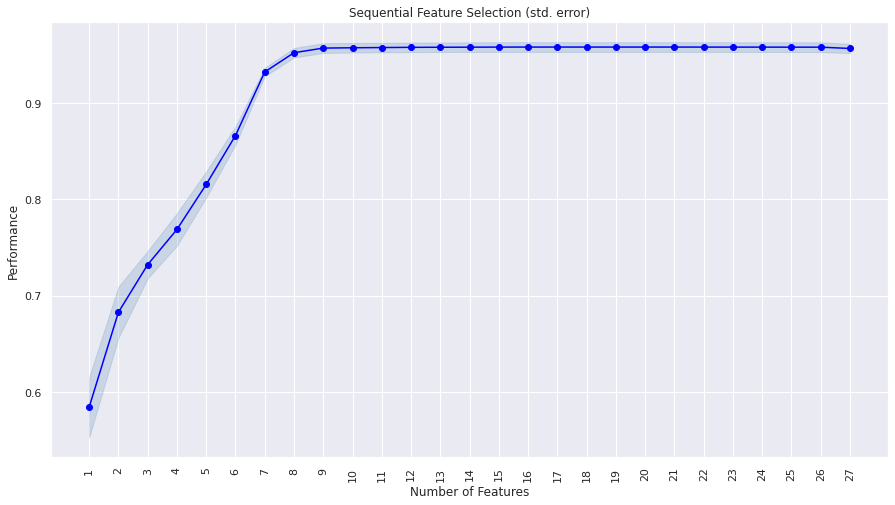

In [ ]:
# create plot of model's performance with each additional feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sfs_perfom_plot = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(15, 8))
plt.title('Sequential Feature Selection (std. error)')
plt.xticks(rotation=90)
plt.show()

- Performance increases till the 9th feature, after that the line flattens indicating it has become constant, and then it looks like a slitght decrease from 26 to 27.
- As there doesn't seem to be any increase in adj. R-squared after the 9th feature is added we will use 9 features for our model.
- This cuts the dimensinality of our model by 2/3rds, resulting in a less complex model.

###Now we can create another Forward Feature Selection with only 9 features this time.

In [ ]:
reg = LinearRegression()

sfs = SFS(
    reg,
    k_features = 9,
    forward = True,
    floating = False,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 2,
    cv = 5
)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.2s finished

[2022-09-10 09:49:11] Features: 1/9 -- score: 0.584107773079073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.3s finished

[2022-09-10 09:49:11] Features: 2/9 -- score: 0.6826110670665327[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished

[2022-09-10 09:49:12] Features: 3/9 -- score: 0.7320378822372116[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.3s finished

[2022-09-10 09:49:12] Features: 4/9 -- score: 0.7685429782626084[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.3s finished

[2022

In [ ]:
# let's check which features are the most important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 3, 6, 21, 22, 23, 24, 25, 26]


In [ ]:
# find column names for important features in list
X_train.columns[feat_cols]

Index(['Year', 'New_Price', 'Power_bhp', 'Car_Price_Class_E_Class',
       'Car_Price_Class_D_Class', 'Car_Price_Class_C_Class',
       'Car_Price_Class_B_Class', 'Car_Price_Class_A_Class',
       'Car_Price_Class_S_Class'],
      dtype='object')

#Let's fit a model with these features

In [ ]:
X_train_final = X_train[X_train.columns[feat_cols]]

In [ ]:
# Make new x_test with the same variables as x_train
X_test_final = X_test[X_train_final.columns]

In [ ]:
# Fitting model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(X_train_final, y_train)

LinearRegression()

In [ ]:
# train set performance
print('Train Performance\n')
lin_reg_model2_train_perform = model_performance(
    lin_reg_model2, X_train_final, y_train
)
lin_reg_model2_train_perform

Train Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.294899,1.319482,0.958952,0.958864,18.813609


In [ ]:
# test set performance
print('Test Performance\n')
lin_reg_model2_test_perform = model_performance(
    lin_reg_model2, X_test_final, y_test
)
lin_reg_model2_test_perform

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.15598,1.358844,0.958154,0.957945,17.977688


- These numbers look nearly identical perhaps a fraction worse, I'm not sure, but we can compare them side by side just to show how close to the same they really are.

In [ ]:
# train comparison

model_train_comp_df = pd.concat(
    [lin_reg_model_train_perform.T, lin_reg_model2_train_perform.T], axis=1
)

model_train_comp_df.columns = [
    'Linear Regression',
    'Linear Regression(SFS features)'
]

print('Training Performance Comparison:')
model_train_comp_df

Training Performance Comparison:


,Linear Regression,Linear Regression(SFS features)
RMSE,2.256431,2.294899
MAE,1.275593,1.319482
R-squared,0.960316,0.958952
Adj. R-squared,0.960060,0.958864
MAPE,18.454912,18.813609


- The numbers are very close to each other but it looks like performance did in fact go down a fraction for the training set.
- We can see that both RMSE and MAE went up, while R2 and ajd. R2 went down. MAPE went up. 
- Overall it looks like we were better off with the first one, but let's check on the test set comparison.

In [ ]:
# test comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perform.T, lin_reg_model2_test_perform.T], axis=1
)

models_test_comp_df.columns = [
    'Linear Regression', 
    'Linear Regression(SFS features)'
]

print('Test Performance Comparsion:')
models_test_comp_df

Test Performance Comparsion:


,Linear Regression,Linear Regression(SFS features)
RMSE,2.120788,2.155980
MAE,1.315788,1.358844
R-squared,0.959509,0.958154
Adj. R-squared,0.958894,0.957945
MAPE,17.353959,17.977688


- Just as with the training set, things did not improve, errors are up and R2's are down.
- We will definitely be sticking with the 1st model we built.

##Conclusions From Model 1(Without Outlier Treatment)
- We have been able to build a predictive model that can be used by Cars4U to predict the price of a used car with an R2 of 0.96 on the training set.

- Cars4U can use this model to predict the used car's price within a mean error of 1.3, and the MAPE of 17.35 means they will be able to use this model to predict prices within 17.4% of the used car's value.

- Some of the most important factors when it comes to determining the price for a used vehicle are 'Year', 'New_Price', 'Power_bhp', and then the price range for similiar vehichles based on the 'Car_Price_Class'bins, we created.

#Building a 2nd Model: This time treating outliers and making other adjustments

- Let's take a look back at the outlierss we were considering dropping before the 1st model.

In [ ]:
num_cols

['Kilometers_Driven', 'New_Price', 'Price', 'Engine_CC', 'Power_bhp']

- These are the numeric columns we were cosidering treating for the outliers we saw when we checked their boxplots earlier.

- We can now create a function to replace all outliers in these columns with the value of either the lower whisker or the upper whisker depending on if their higher or lower.

In [ ]:
# Function to replace outlier values with whisker values
def whisk_out(df2, col):
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    Low_Whisk = Q1 - 1.5 * IQR 
    High_Whisk = Q3 + 1.5 * IQR
    df2[col] = np.clip(df2[col], Low_Whisk, High_Whisk)
                                                      
    return df2

def All_Out_Treat(df2, col_list):
    
    for col in col_list:
        df2 = whisk_out(df2, col)
        
        
    return df2    

In [ ]:
# applying function to our num_cols list to treat outliers
df2 = All_Out_Treat(df2, num_cols)

- All the outliers in the num_cols list have been treated by replacing all high outliers with the high/upper whisker value and all low outliers with the lower whisker value.
- Let's check out the same boxplot outlier check we did before making the 1st model and see how it looks now.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

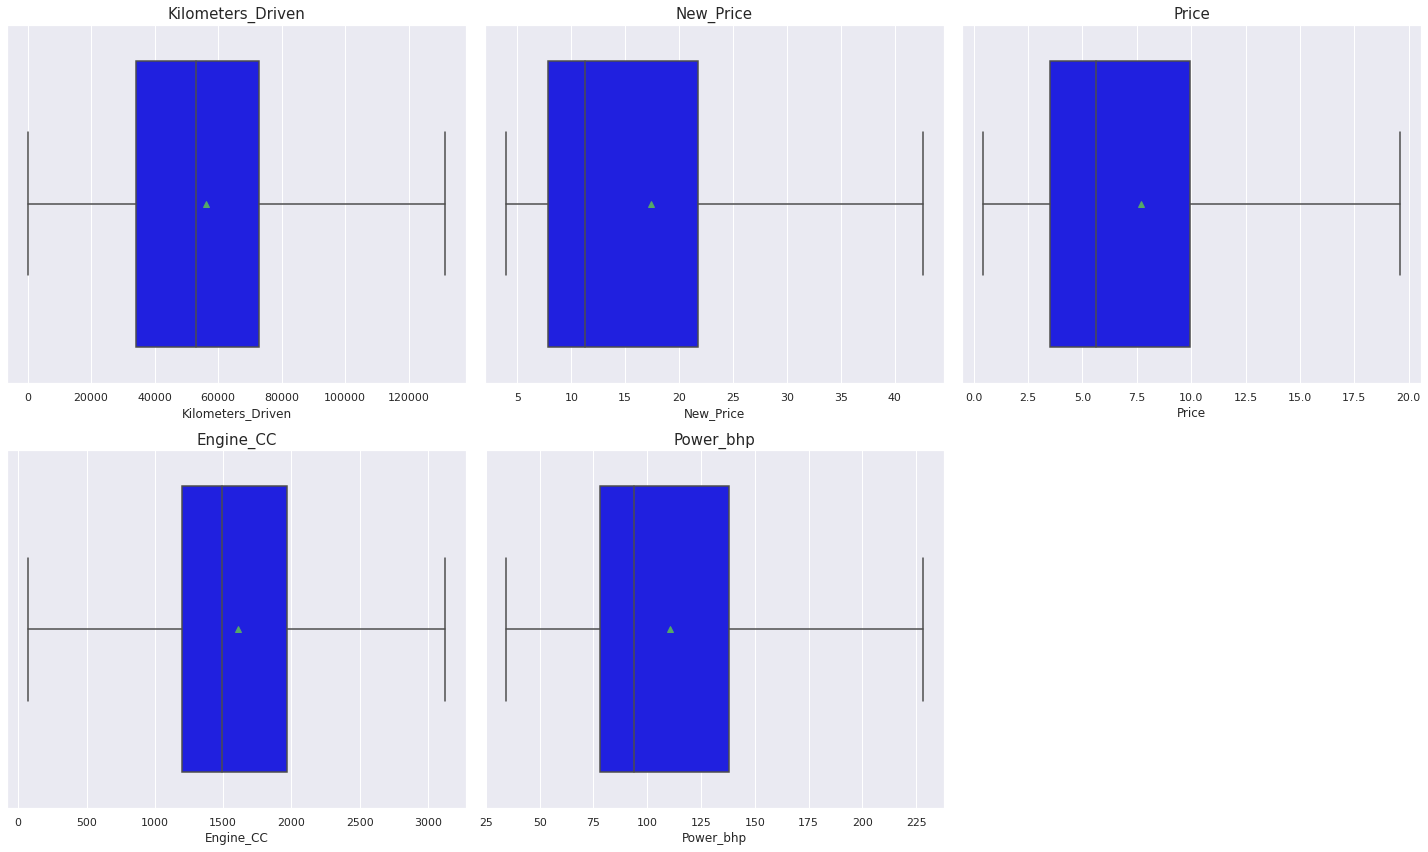

In [ ]:
plt.figure(figsize=(20,12))
for i in range(len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(df2[num_cols[i]],showmeans=True, color='blue')
    plt.tight_layout()
    plt.title(num_cols[i],fontsize=15)

plt.show()

- This looks much nicer! The boxes aren't compressed and hard to see because of the outliers, they are clean and easy too read now that the outliers have been treated.

##Now let's define our independent and dependent variable for model 2

In [ ]:
# We are still dropping the same columns
X2 = df2.drop(['Price', 'Name', 'Fuel_Type', 'Car_Make', 'Car_Model'], axis=1)
y2 = df2['Price']

##Next let's recreate our Dummy Variables for the category columns

In [ ]:
X2 = pd.get_dummies(X2, columns=X2.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)
X2.head()

,Year,Kilometers_Driven,Seats,New_Price,Mileage_km,Engine_CC,Power_bhp,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Car_Price_Class_E_Class,Car_Price_Class_D_Class,Car_Price_Class_C_Class,Car_Price_Class_B_Class,Car_Price_Class_A_Class,Car_Price_Class_S_Class
0,2010,72000.0,5.0,5.510,26.60,998.0,58.16,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,2015,41000.0,5.0,16.060,19.67,1582.0,126.20,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
2,2011,46000.0,5.0,8.610,18.20,1199.0,88.70,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2012,87000.0,7.0,11.270,20.77,1248.0,88.76,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,2013,40670.0,5.0,42.605,15.20,1968.0,140.80,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
X2.shape

(6018, 27)

In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6018 non-null   int64  
 1   Kilometers_Driven          6018 non-null   float64
 2   Seats                      6018 non-null   float64
 3   New_Price                  6018 non-null   float64
 4   Mileage_km                 6018 non-null   float64
 5   Engine_CC                  6018 non-null   float64
 6   Power_bhp                  6018 non-null   float64
 7   Location_Bangalore         6018 non-null   uint8  
 8   Location_Chennai           6018 non-null   uint8  
 9   Location_Coimbatore        6018 non-null   uint8  
 10  Location_Delhi             6018 non-null   uint8  
 11  Location_Hyderabad         6018 non-null   uint8  
 12  Location_Jaipur            6018 non-null   uint8  
 13  Location_Kochi             6018 non-null   uint8

###split data into train and test

In [ ]:
# Splitting the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

###Checking shape for train and test

In [ ]:
print('There are', X2_train.shape[0], 'rows in our train data,')
print('and there are', X2_test.shape[0], 'rows in our test data')

There are 4212 rows in our train data,
and there are 1806 rows in our test data


###Fitting our Model

In [ ]:
lin_reg_model3 = LinearRegression()
lin_reg_model3.fit(X2_train, y2_train)

LinearRegression()

###Get Model Coefficients 

In [ ]:
# check coefficients and intercept of model

coeff_df2 = pd.DataFrame(np.append(lin_reg_model3.coef_, lin_reg_model3.intercept_), 
                       index=X2_train.columns.tolist() + ['Intercept'], columns=['Coefficients'])

coeff_df2

,Coefficients
Year,0.274593
Kilometers_Driven,-0.000003
Seats,0.169929
New_Price,0.080540
Mileage_km,0.033938
Engine_CC,0.000444
Power_bhp,0.011096
Location_Bangalore,0.328604
Location_Chennai,0.047130
Location_Coimbatore,-0.019359


### check Model performance metrics
- We will use the same funtion as before to check for R2, adj. R2, MAE, MAPE

In [ ]:
def adj_r2(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


def model_performance(model, predictors, target):
    
    pred=model.predict(predictors)

    r2 = r2_score(target, pred)
    adjr2 = adj_r2(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)


    df2_perform = pd.DataFrame(
        {
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'Adj. R-squared': adjr2,
            'MAPE': mape
        },
        index = [0]
    )
    return df2_perform

In [ ]:
print('Train Performance\n')
lin_reg_model3_train_perform = model_performance(lin_reg_model3, X2_train, y2_train)
lin_reg_model3_train_perform

Train Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.135104,0.808305,0.960705,0.960452,15.627981


In [ ]:
print('Test Performance\n')
lin_reg_model3_test_perform = model_performance(lin_reg_model3, X2_test, y2_test)
lin_reg_model3_test_perform

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.193935,0.838104,0.958466,0.957836,14.565955


##Observations on Model 2
- Treating the outliers has made a pretty significant improvement in our model's performance.
- The train and test R2 are 0.960 and 0.958, indicating that the model explains 96.0% and 95.8% of the total variation in the train and test sets respectively. This shows that the model is a good fit.
- The RMSE value is 1.13 for the training set and 1.19 for the test set. This is about half the value of RMSE from the 1st model.  This shows a decent size reduction in the root mean squared error for model 2.
- We see that there is a MAE of 0.808 for our training set and an MAE of 0.838 for our test set. So our model is able to preditct used car prices with a mean error of about 0.84
- MAPE of 14.565 means our model able to predict prices within 14.57% of the used car's value.
- This is certainly a noticeable improvement from the first model.
- Of course things can always be improved.

#SequentialFeatureSelector
- We can run Sequential Feature Selector again now that we have treated ourliers and see if it can further improve our already more accurate model 2.

In [ ]:
reg = LinearRegression()

# creating our Forward Feature Selection 
sfs2 = SFS(
    reg,
    k_features = X2_train.shape[1],
    forward = True,
    floating = False,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 2,
    cv = 5
)

# perform our Sequential Forward Feature Selection (SFFS)
sfs2 = sfs2.fit(X2_train, y2_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.5s finished

[2022-09-10 10:55:35] Features: 1/27 -- score: 0.7045004538707941[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.4s finished

[2022-09-10 10:55:35] Features: 2/27 -- score: 0.8516409736633157[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished

[2022-09-10 10:55:36] Features: 3/27 -- score: 0.8687889440329778[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.3s finished

[2022-09-10 10:55:36] Features: 4/27 -- score: 0.896950152584445[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.3s finished

[

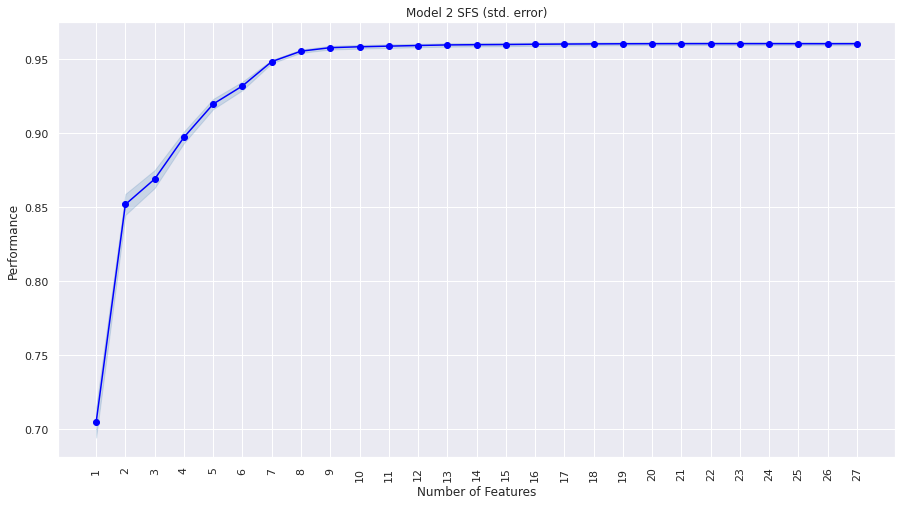

In [ ]:
# plot model's performance with each additional feature
sfs2_perfom_plot = plot_sfs(sfs2.get_metric_dict(), kind='std_err', figsize=(15, 8))
plt.title('Model 2 SFS (std. error)')
plt.xticks(rotation=90)
plt.show()

- It looks like the model again increases in performance up until the 9th feature and then it becomes constant.
- There isn't any drop anymore. This model stays constant all the way from the 9th to 27th feature.

###create Forward Feature Selection with only 9 features this time.

In [ ]:
reg = LinearRegression()

sfs2 = SFS(
    reg,
    k_features = 9,
    forward = True,
    floating = False,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 2,
    cv = 5
)

sfs2 = sfs2.fit(X2_train, y2_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    2.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.4s finished

[2022-09-10 11:07:39] Features: 1/9 -- score: 0.7045004538707941[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.4s finished

[2022-09-10 11:07:39] Features: 2/9 -- score: 0.8516409736633157[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished

[2022-09-10 11:07:40] Features: 3/9 -- score: 0.8687889440329778[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.3s finished

[2022-09-10 11:07:40] Features: 4/9 -- score: 0.896950152584445[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent worke

In [ ]:
# let's check which features are the most important
feat_cols2 = list(sfs2.k_feature_idx_)
print(feat_cols2)

[0, 3, 6, 21, 22, 23, 24, 25, 26]


In [ ]:
# column names
X2_train.columns[feat_cols2]

Index(['Year', 'New_Price', 'Power_bhp', 'Car_Price_Class_E_Class',
       'Car_Price_Class_D_Class', 'Car_Price_Class_C_Class',
       'Car_Price_Class_B_Class', 'Car_Price_Class_A_Class',
       'Car_Price_Class_S_Class'],
      dtype='object')

- These are the same 9 columns that we got from the SFS in model 1

##Let's fit these features

In [ ]:
X2_train_final = X2_train[X2_train.columns[feat_cols2]]

In [ ]:
X2_test_final = X2_test[X2_train_final.columns]

In [ ]:
# Fitting model
lin_reg_model4 = LinearRegression()
lin_reg_model4.fit(X2_train_final, y2_train)

LinearRegression()

In [ ]:
# train set performance
print('Train Performance\n')
lin_reg_model4_train_perform = model_performance(
    lin_reg_model4, X2_train_final, y2_train
)
lin_reg_model4_train_perform

Train Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.177406,0.846952,0.957722,0.957632,16.678545


In [ ]:
# test set performance
print('Test Performance\n')
lin_reg_model4_test_perform = model_performance(
    lin_reg_model4, X2_test_final, y2_test
)
lin_reg_model4_test_perform

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.237515,0.879918,0.955379,0.955155,15.800999


- The numbers are close, but overall performance is lower than before SFS. 
- MAPE is a noticeable amount higher for train and test, while MAE and RMSE seem to be worse than pre SFS, but the difference is so small that it's hard to tell.
- Let's look at a side by side

In [ ]:
# train comparison

model_train_comp_df2 = pd.concat(
    [lin_reg_model3_train_perform.T, lin_reg_model4_train_perform.T], axis=1
)

model_train_comp_df2.columns = [
    'Linear Regression Model 2',
    'Linear Regression Model 2(SFS features)'
]

print('Training Performance Comparison Model2:')
model_train_comp_df2

Training Performance Comparison Model2:


,Linear Regression Model 2,Linear Regression Model 2(SFS features)
RMSE,1.135104,1.177406
MAE,0.808305,0.846952
R-squared,0.960705,0.957722
Adj. R-squared,0.960452,0.957632
MAPE,15.627981,16.678545


From Linear Regression to Linear Regression(SFS features) Model 2

- this shows an all aroung decrease in performance metrics when applying SFS for model 2.
- RMSE and MAE both go up, this results in increasing error.
- R2 and adj. R2 both go down, explaining less variance.
- MAPE increase causing predicitblity errror to increase

Overall the changes are mostly small, but MAPE is 1 full percent different when SFS is performed on model2.

In [ ]:
# test comparison

models_test_comp_df2 = pd.concat(
    [lin_reg_model3_test_perform.T, lin_reg_model4_test_perform.T], axis=1
)

models_test_comp_df2.columns = [
    'Linear Regression Model 2', 
    'Linear Regression Model 2(SFS features)'
]

print('Test Performance Comparsion Model 2:')
models_test_comp_df2

Test Performance Comparsion Model 2:


,Linear Regression Model 2,Linear Regression Model 2(SFS features)
RMSE,1.193935,1.237515
MAE,0.838104,0.879918
R-squared,0.958466,0.955379
Adj. R-squared,0.957836,0.955155
MAPE,14.565955,15.800999


- RMSE and MAE by increase by a slight amount when adding SFS Feature causing the error level in the model to rise.
- R2 and adj. R2 go down when adding SFS, but only by a fraction.
- MAPE is the most noticeable as it increases almost 1 whole percent when adding the SFS Faeture.
- Just like the training comparison, the test comparison shows a decline in accuracy, so the clear choice here is to continure with the original Model2, not using the SFS feature.

#Final Conclusion and Business Insights

Working with the data I was able to create 2 Linear Regressiond Models each with 2 versions. For total of 4 different models to choose from.
1. Model 1(No Outlier Treatment): 
- Model 1 was created before treating any outliers as the title says, but there definitely were some outliers, even a few extreme ones. 
- I was concerned about dropping or replacing them as the nature of the data covered did allow for some of these extremes like a vehicle with 6.5 million km driven, or a car that had a New Price of 375 INR Lakhs(over 470,000 USD). -
- Running this model, even with all of the outliers, produced fairly decent results with R2 of 0.96 and MAPE of 17.4 allowing predictions of a used car's value within 17.4% of the actual value, but it did have an RMSE over 2 and an MAE greater than 1.
- Mode1 1(No Outlier Treatment) adding Sequential Feature Selection(SFS): It reduced dimensionality to only 9 features which were ['Year', 'New_Price', 'Power_bhp', 'Car_Price_Class_E_Class', 'Car_Price_Class_D_Class' 'Car_Price_Class_C_Class', 'Car_Price_Class_B_Class' 'Car_Price_Class_A_Class', 'Car_Price_Class_S_Class'] These are the features which have the biggest impact on Price.
- Unfortunately Reducing dimensionality to just these 9 features actuallty caused performance to worsen slightly.
- Looking at the important features 6 out of 9, 2/3rds, of the features were from the 7 price class bins I created to try and show a representation of the different kinds of vehicles. 
- I did it this way as it was less than 2041 unique cars in the data, and less than 32 Makes/Brands which was my first idea. But since these are bins I created on some semi-regular pricing intervals, there could definitely be more done to improve the price bins, possibly makeing more or less, or creating a different representative breakdown of the vehicles. Either way binning the car types in some way seems to be the most important featue, followed by Year, New Price, and Power.
2. Model 2 had outlier treatment applied to a few of the numeric columns, ['Kilometers_Driven', 'New_Price', 'Price', 'Engine_CC', 'Power_bhp'], using the IQR method to replace any hgh outlier values with the upper whisker value and low outliers with the lower whisker value. This made a big difference as model 2's performance does see a nice increase with R2 of 0.96, MAE of 0.83, and an MAPE of 14.56 allowing model 2 to predicat a used cars value within 14.6%.
- Adding SFS features did not improve Model 2.





##Cars4U Summmary Suggestion

My suggestions to cars4U is to use Model 2 which has a decent prediction accuracy and to increase it further they could look at treating the outliers differently perhaps, but the bigger factor to increase accuracy would be finding a good way to break the cars down into categories because model 2 showed the same 9 columns with 6 being bins I created for car price classifaction. Dividing the cars down by Make/Brand along with price range, using the treated outliers with Model 2 will give you the best predictions and a good way to adjust it in order to increase accuracy now and with more data in the Future.

In [ ]:
!jupyter nbconvert --to html /Cars4U_Jonathan_Hutcheson.ipynb

[NbConvertApp] Converting notebook /Cars4U_Jonathan_Hutcheson.ipynb to html
[NbConvertApp] Writing 1826175 bytes to /Cars4U_Jonathan_Hutcheson.html
